# **Business Background**



Investment Management ABC is Indonesian Investment Startup that make mutual funds market place.
The mutual funds consist of:
1. Stocks mutual funds (saham)
2. Bond mutual funds (pendapatan tetap)
3. Money market mutual funds (pasar uang
4. Mixed-investment mutual funds (campuran)

**Problem:**
What kind of thematic campaigns that we can recommend to the marketing team for the next month?

--> Thematic campaigns based on user preference

--> Create segmentation for campaign and give recommendation

**Dataset:**

users: https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0

daily_user_transaction: https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0

# **Data Preparation**

## Import Library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


## Import Dataset

In [2]:
# import users data
sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=0','/export?format=csv&gid=0')
print(sheet_url_trf)
df_users = pd.read_csv(sheet_url_trf)
df_users.head()

https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/export?format=csv&gid=0


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [3]:
# import daily_user_transaction data
sheet_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=0','/export?format=csv&gid=0')
print(sheet_url_trf)
df_dus = pd.read_csv(sheet_url_trf)
df_dus.head()

https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/export?format=csv&gid=0


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


## **Data Cleaning**


*   Unique values
*   Treating missing values (state the reasoning)
* Outliers (using IQR)
* Check Duplicates, retain only the first record
* Check data & convert data types
* Check typos
* Check time series data
* Merge the dataset







## **Users**

### Check Data Type

In [4]:
# 1. create copy of the original data for data cleaning
df_users_copy = df_users.copy()

In [5]:
# 2. check number of rows and columns
df_users_copy.shape

(14712, 11)

In [6]:
# 3. check the content of table and data type
df_users_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [7]:
# 4. check null values
df_users_copy.isnull().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

In [8]:
# check column referral_code that has 9108 null
df_users_copy['referral_code_used']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4        used referral
             ...      
14707              NaN
14708              NaN
14709              NaN
14710              NaN
14711    used referral
Name: referral_code_used, Length: 14712, dtype: object

**Actions:**
1.  Create copy data
2.  Check number of rows and columns
3.  Check column title and data type
4.  Check null values
5.  Check duplicates

**Result:**

3.1 registration_import_datetime data type is not datetime; user_id data type is int64

4.1 There are 9108 null values in referral_code_used

5.1 No duplicate data

How to create that result? So, the next to do is as below

**Next to do:**

3.1.1 change data type of registration_import_datetime, user_id

4.1.1 Replace null values in referral_code_used

5.1.1 Delete duplicate data

In [9]:
# 4.1.1 change NaN in referral_code to be 'no referral' --> result: no null value in referral_code_used
df_users_copy['referral_code_used'].replace(np.nan,'no referral', inplace = True)
df_users_copy['referral_code_used']

0          no referral
1          no referral
2          no referral
3          no referral
4        used referral
             ...      
14707      no referral
14708      no referral
14709      no referral
14710      no referral
14711    used referral
Name: referral_code_used, Length: 14712, dtype: object

In [10]:
# 3.1. 1 check data in registration_import_datetime column
df_users_copy['registration_import_datetime']

0        2021-09-17 14:10:44
1        2021-10-09 11:11:34
2        2021-10-08 01:27:30
3        2021-08-12 07:19:32
4        2021-08-15 09:31:24
                ...         
14707    2021-10-17 15:57:23
14708    2021-10-15 12:44:05
14709    2021-10-11 10:06:15
14710    2021-10-21 13:42:20
14711    2021-10-22 00:55:26
Name: registration_import_datetime, Length: 14712, dtype: object

In [11]:
df_users_copy['registration_import_datetime'] = pd.to_datetime(df_users_copy['registration_import_datetime']) # change the data type of registration_import_datetime, from object to datetime
df_users_copy.info()                                                                                          # check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

In [12]:
df_users_copy['user_id'] = df_users_copy['user_id'].astype(str)   # change the data type of user_id, from int64 to string

In [13]:
df_users_copy.info() # check the data type user_id after replaced. result --> user_id data type changed into object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

### Check and Drop Duplicates

In [14]:
# drop double user_id (duplicate) --> result: no duplicate, total row still 14712
df_users_copy_dup = df_users_copy.drop_duplicates(['user_id'])
df_users_copy_dup

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0
...,...,...,...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,0,0,0
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Lainnya,0,0,0
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Dari Suami / istri,0,0,0
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,0,0,0


### Check Values & Typos

In [15]:
# check columns in table, using df that has been cleaned from duplicate
df_users_copy_dup.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

In [16]:
df_users_copy_dup['user_gender'].value_counts() # user_gender is normal, no action needed

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [17]:
df_users_copy_dup['user_age'].value_counts().head() # user_age is normal, data manipulation needed, check data manipulation

21    1192
20    1058
23    1031
19     972
22     963
Name: user_age, dtype: int64

Insight: Need to make group age category --> check data manipulation

In [18]:
df_users_copy_dup['user_occupation'].value_counts() # user_occupation is normal, no action needed

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [19]:
df_users_copy_dup['user_income_range'].value_counts() # user_income_range is normal, no action needed

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [20]:
df_users_copy_dup['user_income_source'].value_counts() # user_income_source is normal, no action needed

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

In [21]:
df_users_copy_dup['end_of_month_invested_amount'].value_counts() # end_of_month_invested_amount

0            8528
100000       1107
10000         686
200000        470
500000        250
             ... 
900000000       1
3275000         1
1730000         1
251604          1
71100000        1
Name: end_of_month_invested_amount, Length: 1042, dtype: int64

In [22]:
mask = df_users_copy_dup['end_of_month_invested_amount'] >= 700000000 # check the end_of_month_invested month > 700000000 
df_users_copy_dup[mask]                                               

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
6520,4056373,2021-09-21 17:01:48,Male,23,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Gaji,900000000,350000000,0
9965,3764129,2021-08-05 22:42:06,Female,28,Swasta,> Rp 50 Juta - 100 Juta,used referral,Gaji,970000000,770000000,0
11148,3902455,2021-08-26 09:21:04,Female,30,IRT,> Rp 50 Juta - 100 Juta,no referral,Dari Orang Tua / Anak,1012200000,433800000,0
12284,3726685,2021-08-04 08:37:36,Male,33,Swasta,< 10 Juta,no referral,Gaji,800000751,799500000,-499249


**Result:**

No typo and outlier, except end_of_month_invested_amount and others data with data type int64, need to check the outlier using boxplot

### Data Manipulation

In [23]:
# create bins for age groups
bins = [0, 17, 24, 34, 44, 54, 64, np.inf]

# create labels for age groups, 7 categories
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '>65']

# use pd.cut to create age groups column
df_users_copy_dup['age_group'] = pd.cut(df_users_copy_dup['user_age'], bins=bins, labels=labels)

# view the data with age group column
df_users_copy_dup.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0,45-54
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0,55-64
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0,45-54
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54


### Check Data Outliers

<AxesSubplot:>

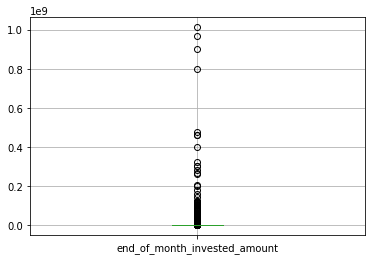

In [24]:
df_users_copy_dup.boxplot(column=['end_of_month_invested_amount'])

In [25]:
# Hitung kuartil 1 dan 3
Q1 = df_users_copy_dup['end_of_month_invested_amount'].quantile(0.25)
Q3 = df_users_copy_dup['end_of_month_invested_amount'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 125000.0

IQR:
 125000.0

Min:
 -187500.0

Max:
 312500.0


Still keep the outliers to describe some profile

### Cleaned Data Users

In [26]:
df_users_clean = df_users_copy_dup.copy() #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_users_clean.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0,45-54
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0,55-64
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0,45-54
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54


In [27]:
df_users_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 14711
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
 11  age_group                   

In [28]:
df_users_clean.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount', 'age_group'],
      dtype='object')

## **Daily User Transaction**

### Check Data Type

In [29]:
# 1. make a copy for data cleaning
df_dus_copy = df_dus.copy()

In [30]:
# check the snippet of the data
df_dus_copy.head() 

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


In [31]:
# 2. check number of rows and columns
df_dus_copy.shape

(158811, 17)

In [32]:
# 3. check the content of table and data type
df_dus_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [33]:
# 4. check null values
df_dus_copy.isnull().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

**Action**
1.  Create copy data
2.  Check number of rows and columns
3.  Check column title and data type
4.  Check null values
5.  Check duplicates

**Result**

2.1 all columns are still needed

3.1 user_id type is int64; date type is object

4.1 some data have missing value or null

**Next to do**

3.1.1 change user_id and date data type

4.1.1 filling the missing value

In [34]:
# 3.1.1 change the data type of user_id to string
df_dus_copy['user_id'] = df_dus_copy['user_id'].astype(str)
# check the data type after change to string
df_dus_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  object 
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [35]:
# check data in date column
df_dus_copy['date']

0         2021-08-30
1         2021-08-31
2         2021-09-01
3         2021-09-02
4         2021-09-03
             ...    
158806    2021-09-30
158807    2021-09-30
158808    2021-09-30
158809    2021-09-30
158810    2021-09-30
Name: date, Length: 158811, dtype: object

In [36]:
# change the data type of date, from object to datetime
df_dus_copy['date'] = pd.to_datetime(df_dus_copy['date'])
df_dus_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

In [37]:
# check date range
df_dus_copy['date'].describe()

# result: date from 2021-08-04 - 2021-09-30

<ipython-input-37-7a9e15580e6b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_dus_copy['date'].describe()


count                  158811
unique                     42
top       2021-09-30 00:00:00
freq                     8277
first     2021-08-04 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [38]:
# replace null value with 0
df_dus_copy.fillna(0, inplace=True)

In [39]:
df_dus_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

### Check and Drop Duplicates

Check duplicates by input all columns, because eventhough the users_id has many duplicates, but it has different date, so I put all variables to check duplicates

In [40]:
# create df_dus_copya to check the duplicates
df_dus_copya = df_dus_copy

In [41]:
df_dus_copya.columns

Index(['user_id', 'date', 'buy_saham_transaction_amount',
       'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

In [42]:
df_dus_copya = df_dus_copya.drop_duplicates()
df_dus_copya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [43]:
df_dus_copyb = df_dus_copya.copy() # create copy for temporary check
df_dus_copyb.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,10000000.0,10000000


Result: No duplicated data

In [44]:
#drop duplicate user_id to see the final total invested amount in last user's transaction
df_duplicates_dropped = df_dus_copyb.sort_values('date', ascending=True).drop_duplicates(['user_id'], keep='last')
df_duplicates_dropped

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
59567,3786300,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
48725,3760891,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,249864.0,0.0,550000.0,0.0,799864
155809,4096532,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13352136.0,2387932.0,8149154.0,0.0,23889222
17271,2836295,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
17313,2839273,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,10000.0,0.0,0.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6240,1191842,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,100000.0,0.0,100000
77807,3820288,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50000.0,60000.0,40000.0,0.0,150000
127714,3950513,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50000.0,10000.0,40000.0,0.0,100000
77865,3820327,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,200000.0,0.0,0.0,200000


In [45]:
# drop buy and sell columns, because we only need total invest in each instrument
df_dus_totalonly = df_duplicates_dropped.drop(['buy_saham_transaction_amount','sell_saham_transaction_amount',
       'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount'], axis=1)
df_dus_totalonly.head()

,user_id,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
59567,3786300,2021-09-30,0.0,0.0,0.0,0.0,0
48725,3760891,2021-09-30,249864.0,0.0,550000.0,0.0,799864
155809,4096532,2021-09-30,13352136.0,2387932.0,8149154.0,0.0,23889222
17271,2836295,2021-09-30,0.0,0.0,0.0,0.0,0
17313,2839273,2021-09-30,0.0,10000.0,0.0,0.0,10000


In [46]:
df_dus_totalonly.columns

Index(['user_id', 'date', 'saham_invested_amount',
       'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount',
       'campuran_invested_amount', 'total_invested_amount'],
      dtype='object')

**Result:** 

user_id distinct and shows only last total investment in each instrument and its total

### Cleaned Daily User Transaction

2 type of cleaned data of daily user transaction.

1. no deleted data

2. dropped user_id duplicate and buy-sell columns to see the total transaction in each instrument.

We still need buy and sell column to describe the trend of transaction of each product.

In [47]:
# type no. 1
df_dus_clean = df_dus_copya.copy() # copy the data to df_dus_clean
df_dus_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [48]:
# type no. 2
df_dus_total_clean = df_dus_totalonly.copy() # copy the data to df_dus_total_clean
df_dus_total_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 59567 to 158810
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   date                              8277 non-null   datetime64[ns]
 2   saham_invested_amount             8277 non-null   float64       
 3   pasar_uang_invested_amount        8277 non-null   float64       
 4   pendapatan_tetap_invested_amount  8277 non-null   float64       
 5   campuran_invested_amount          8277 non-null   float64       
 6   total_invested_amount             8277 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 517.3+ KB


## **Merge Data**

In [49]:
# merge data df_users_clean and df_dus_totalonly to describe user's investment characteristic for the month ended September 2021
df_merge = df_users_clean.merge(df_dus_totalonly)
df_merge.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-09-30,290000.0,40000.0,270000.0,0.0,600000
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54,2021-09-30,8920000.0,1350000.0,3230000.0,0.0,13500000
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,999000,149000,0,45-54,2021-09-30,40000.0,10000.0,50000.0,899000.0,999000
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0,55-64,2021-09-30,0.0,10000.0,0.0,0.0,10000
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,110431,1000000,-1889569,55-64,2021-09-30,0.0,0.0,110431.0,0.0,110431


# **EDA**

# **Descriptive statistics:**

- How many users do we have in the data?

- How is the demographic in the data?

- How many users buy products in each mutual fund?

### Descriptive information about numeric variable

In [50]:
df_merge.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount', 'age_group', 'date',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

In [51]:
df_merge.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-09-30,290000.0,40000.0,270000.0,0.0,600000
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54,2021-09-30,8920000.0,1350000.0,3230000.0,0.0,13500000
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,999000,149000,0,45-54,2021-09-30,40000.0,10000.0,50000.0,899000.0,999000
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0,55-64,2021-09-30,0.0,10000.0,0.0,0.0,10000
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,110431,1000000,-1889569,55-64,2021-09-30,0.0,0.0,110431.0,0.0,110431


In [52]:
# check data description in each market transaction
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount']
desc_eda = df_merge[numeric].describe()
desc_eda

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,8277.000,8277.000,8277.000,8277.000,8277.000
mean,336447.804,783348.490,1260824.000,189573.798,2570194.092
std,2034381.592,13572191.282,18366891.833,3937860.274,25373321.962
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000
50%,0.000,10000.000,10000.000,0.000,100000.000
75%,100000.000,100000.000,110000.000,0.000,500000.000
max,61840000.000,1012200000.000,970000000.000,300000000.000,1012200000.000


In [53]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric =  ['saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount']

desc_eda = df_merge[numeric].describe()
desc_eda.loc['kurtosis'] = df_merge[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_merge[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_merge[numeric].var() #show variance statistic
desc_eda.round(2)

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,8277.000,8277.000,8277.000,8277.000,8277.000
mean,336447.800,783348.490,1260824.000,189573.800,2570194.090
std,2034381.590,13572191.280,18366891.830,3937860.270,25373321.960
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000
50%,0.000,10000.000,10000.000,0.000,100000.000
75%,100000.000,100000.000,110000.000,0.000,500000.000
max,61840000.000,1012200000.000,970000000.000,300000000.000,1012200000.000
kurtosis,349.530,3904.980,1527.590,4133.600,925.880
skewness,16.300,56.680,35.390,57.440,27.630


Insights:


Mostly, users buy pasar uang and pendapatan tetap with bigger value than others --> mostly users are conservative investors
*   Average amount of investment in reksadana:
    - saham: 336447
    - pasar uang: 783348
    - pendapatan tetap: 1260824
    - campuran: 189573

Generally, users put more investment in reksadana pendapatan tetap, shown by the average amount of investement of reksadana pendapatan tetap is bigger than others.

There are big amount of money invested in reksadana pasar uang and reksadana pendapatan tetap --> users save money in a low risk instrument





In [54]:
# sum total buy saham of each user
df_total_buy_saham = df_dus_clean.groupby('user_id')['buy_saham_transaction_amount'].sum
df_total_buy_saham()

user_id
1004326        0.000
1005053        0.000
1005165        0.000
1018814        0.000
1023627        0.000
             ...    
988940         0.000
989618    480000.000
990466    770000.000
99245          0.000
997938    100000.000
Name: buy_saham_transaction_amount, Length: 8277, dtype: float64

In [55]:
# sum total buy pasar uang of each user
df_total_buy_pasar_uang = df_dus_clean.groupby('user_id')['buy_pasar_uang_transaction_amount'].sum
df_total_buy_pasar_uang()

user_id
1004326        0.000
1005053        0.000
1005165        0.000
1018814        0.000
1023627        0.000
             ...    
988940         0.000
989618    100000.000
990466    150000.000
99245          0.000
997938    150000.000
Name: buy_pasar_uang_transaction_amount, Length: 8277, dtype: float64

In [56]:
# sum total buy pendapatan tetap of each user
df_total_buy_pendapatan_tetap = df_dus_clean.groupby('user_id')['buy_pendapatan_tetap_transaction_amount'].sum
df_total_buy_pendapatan_tetap()

user_id
1004326         0.000
1005053         0.000
1005165         0.000
1018814         0.000
1023627         0.000
              ...    
988940          0.000
989618    1420000.000
990466     580000.000
99245           0.000
997938          0.000
Name: buy_pendapatan_tetap_transaction_amount, Length: 8277, dtype: float64

In [57]:
# sum total buy pendapatan tetap of each user
df_total_buy_campuran = df_dus_clean.groupby('user_id')['buy_campuran_transaction_amount'].sum
df_total_buy_campuran()

user_id
1004326   0.000
1005053   0.000
1005165   0.000
1018814   0.000
1023627   0.000
           ... 
988940    0.000
989618    0.000
990466    0.000
99245     0.000
997938    0.000
Name: buy_campuran_transaction_amount, Length: 8277, dtype: float64

In [58]:
df_total_buy_saham('buy_saham_transaction_amount').mean() # check average buy saham by users

192140.46514437598

In [59]:
df_total_buy_pasar_uang('buy_pasar_uang_transaction_amount').mean() # check average buy pasar uang by users

450119.46429865895

In [60]:
df_total_buy_pendapatan_tetap('buy_pendapatan_tetap_transaction_amount').mean() # check average buy pendapatan tetap by users

791489.3042165035

In [61]:
df_total_buy_campuran('buy_campuran_transaction_amount').mean() # check average buy campuran by users

64205.267850670534

**Insight:**

Average total buy saham (high risk investment) = 192140 

Average total buy pasar uang (low risk investment) = 450119

Average buy pendapatan tetap (low risk investment) = 791489

Average buy campuran (moderate) = 64205


**Users buy more reksadana pendapatan tetap**, then pasar uang. This confirm the average of invested amount that resulting average amount of investing in pendapatan tetap is the biggest among others.

The conclusion, users are conservative investor (able with low risk investment).

## Descriptive information about string variable

In [62]:
objects = ['user_gender','user_occupation', 'user_income_range', 'referral_code_used','user_income_source']

df_users_clean[objects].describe()

,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,14712,14712,14712,14712,14712
unique,2,9,6,2,10
top,Male,Pelajar,< 10 Juta,no referral,Gaji
freq,8977,7887,6275,9108,9131


**Insigths:**



*   We have 14712 users
*   The profile are mostly male as student with income range < 10 juta from gaji
*   Mostly users are have no referral --> need to improve the marketing tools



In [63]:
objects = ['age_group']
df_users_clean[objects].describe()

,age_group
count,14712
unique,7
top,18-24
freq,6888


**Insigths:**
* If we could make a category of users age, mostly the users are in 18-24, this is relevant to the user occupation that usually at that age are pelajar and have income < 10 juta. 

* 6888 users are in age group 18-24 y.o.

In [64]:
df_dus_clean['date'].describe()

<ipython-input-64-3daeadccd41f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_dus_clean['date'].describe()


count                  158811
unique                     42
top       2021-09-30 00:00:00
freq                     8277
first     2021-08-04 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

**Insight:**

Range of transaction date is from 2021-08-04 to 2021-09-30

## Number of Users

In [65]:
# number of users
df_users_clean['user_id'].count()

14712

**Insight:**

We have 8277 users by the end of September 2021 that create transaction

## Check users demographic

In [66]:
# check users gender proportion
user_gender = df_users_clean.groupby('user_gender')['user_id'].count() #Count the user id as users and group it by the user gender
user_gender = user_gender.reset_index() # reset the index to make it into a pandas dataframe
user_gender

,user_gender,user_id
0,Female,5735
1,Male,8977


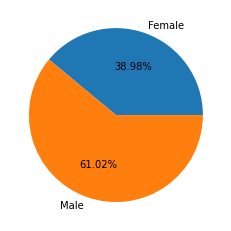

In [67]:
# creating pie chart
plt.pie(user_gender['user_id'], labels = user_gender['user_gender'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

**Insight:**

Most users are male with percentage 61.02% and the rest are female

In [68]:
# check users occupation
user_occupation = df_users_clean.groupby('user_occupation')['user_id'].count() #Count the user id as users and group it by the user occupation
user_occupation = user_occupation.reset_index() # reset the index to make it into a pandas dataframe
user_occupation

,user_occupation,user_id
0,Guru,106
1,IRT,934
2,Others,1683
3,PNS,191
4,Pelajar,7887
5,Pengusaha,598
6,Pensiunan,5
7,Swasta,3263
8,TNI/Polisi,45


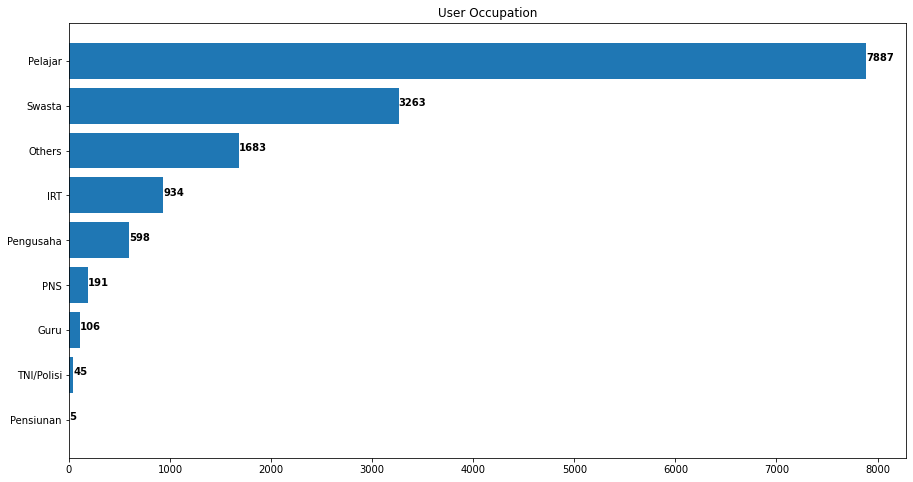

In [69]:
fig = plt.figure(figsize =(15, 8))    #To create the canvas, figsize is showing size in inches (x,y)

K = user_occupation.copy()   

K.sort_values('user_id', ascending=True, inplace=True) #Sort the values descendingly
x = K['user_occupation']    #assign the x
y = K['user_id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

#Add title to chart
plt.title("User Occupation")
# plt.xlabel("")
# plt.ylabel("")

plt.show()

**Insight:**

* Most users are pelajar as 7887 users

In [70]:
# check users age group
age_group = df_users_clean.groupby('age_group')['user_id'].count() #Count the user id as users and group it by the age group
age_group = age_group.reset_index() # reset the index to make it into a pandas dataframe
age_group

,age_group,user_id
0,0-17,268
1,18-24,6888
2,25-34,5123
3,35-44,1620
4,45-54,634
5,55-64,158
6,>65,21


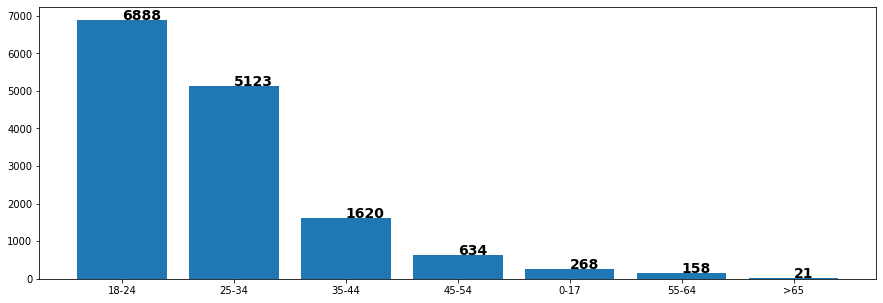

Text(0.5, 1.0, 'User Age Group')

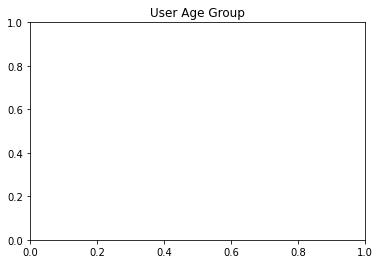

In [71]:
fig = plt.figure(figsize =(15, 5))

K = age_group.copy()

K.sort_values('user_id', ascending=False, inplace=True)
x = K['age_group']
y = K['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold', fontsize = 14)

plt.bar(x, y)   #Create the bar chart
plt.show()

#Add title to chart
plt.title("User Age Group")

**Insight:**

Most users are in the age of 18-24 with number of users are 6888.

In [72]:
# check users age 'user_income_range'
user_income_range = df_users_clean.groupby('user_income_range')['user_id'].count() #Count the user id as users and group it by the 'user_income_range'
user_income_range = user_income_range.reset_index() # reset the index to make it into a pandas dataframe
user_income_range

,user_income_range,user_id
0,< 10 Juta,6275
1,> Rp 1 Miliar,27
2,> Rp 100 Juta - 500 Juta,1114
3,> Rp 50 Juta - 100 Juta,2390
4,> Rp 500 Juta - 1 Miliar,90
5,Rp 10 Juta - 50 Juta,4816


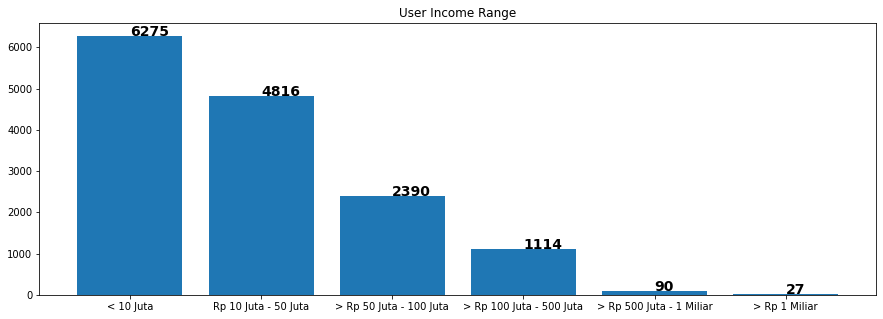

In [73]:
fig = plt.figure(figsize =(15, 5))

K = user_income_range.copy()

K.sort_values('user_id', ascending=False, inplace=True)
x = K['user_income_range']
y = K['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold', fontsize = 14)

#Add title to chart
plt.title("User Income Range")

plt.bar(x, y)   #Create the bar chart
plt.show()

**Insight:**


Mostly users are have income < 10 mio.

## Check how many users invest in each types of mutual funds

In [74]:
# check how many users invest in each types of mutual funds
# change the data type from float to boolean, so that we can count the transaction buy in each reksadana
df_coba = df_dus_clean.copy()
df_coba[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']] = df_dus_clean[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']].astype(bool)
df_coba.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  bool          
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  bool          
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  bool          
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  bool          
 9   sell_campuran_t

In [75]:
mutual_fund_counts = df_coba.groupby(['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']).agg({'user_id': 'nunique'})


In [76]:
num_users_saham = mutual_fund_counts.loc[(True, False, False, False), 'user_id']
num_users_pasar_uang = mutual_fund_counts.loc[(False, True, False, False), 'user_id']
num_users_pendapatan_tetap = mutual_fund_counts.loc[(False, False, True, False), 'user_id']
num_users_campuran = mutual_fund_counts.loc[(False, False, False, True), 'user_id']



In [77]:
# check how many users invest in each types of mutual funds
df_user_buy = num_users_saham,num_users_pasar_uang,num_users_pendapatan_tetap,num_users_campuran
df_user_buy

(842, 1292, 1277, 64)

**Insight:**

Users who buy reksadana saham = 842

Users who buy reksadana pasar uang = 1292

Users who buy reksadana pendapatan tetap = 1277

Users who buy reksadana campuran = 64

From the data above, users are tend to invest in reksadana pasar uang and least interested in reksadana campuran.

The users who buy reksadana pasar uang are the biggest.

## Trend of The Transaction

In [78]:
# using data before merge because need daily transaction data
df_dus_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [79]:
df_dus_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
1,50701,2021-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
2,50701,2021-09-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
3,50701,2021-09-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
4,50701,2021-09-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000


In [80]:
daily_user_transaction_buy = df_dus_clean[df_dus_clean['total_buy_transaction_amount']>0]
buy_grouped = daily_user_transaction_buy.groupby(['date'])
buy_grouped = buy_grouped['user_id'].agg(['count']).reset_index()
buy_grouped.head()

,date,count
0,2021-08-05,10
1,2021-08-06,31
2,2021-08-09,33
3,2021-08-10,52
4,2021-08-11,78


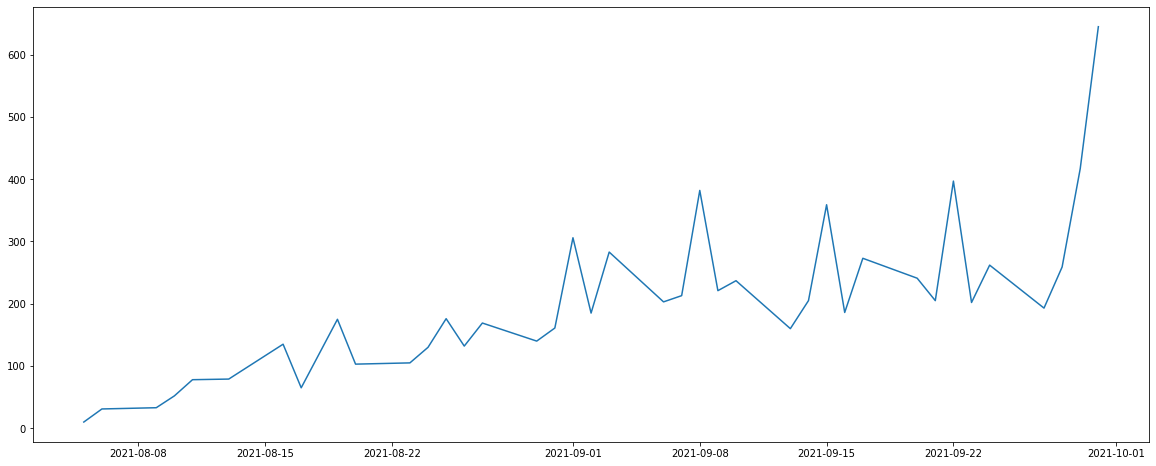

In [81]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.plot('date','count', data=buy_grouped)
plt.show()

Insight:
Buy transaction, generally was slightly increasing from August to September and rose rapidly in the end of September 2021.

In [82]:
daily_user_transaction_sell = df_dus_clean[df_dus_clean['total_sell_transaction_amount']<0]
sell_grouped = daily_user_transaction_sell.groupby(['date'])
sell_grouped = sell_grouped['user_id'].agg(['count']).reset_index()
sell_grouped.head()

,date,count
0,2021-08-05,3
1,2021-08-06,5
2,2021-08-09,30
3,2021-08-10,19
4,2021-08-11,33


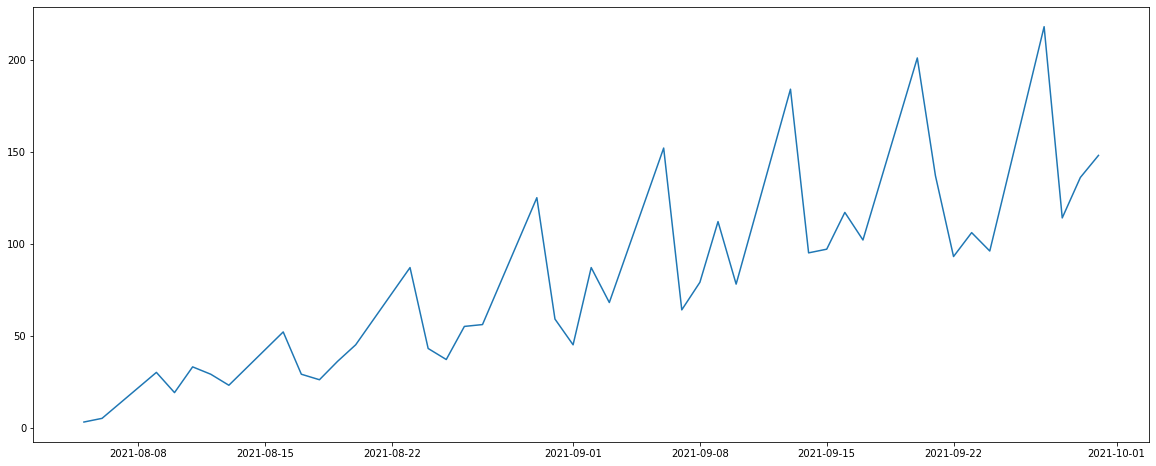

In [83]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.plot('date','count', data=sell_grouped)
plt.show()

Insight:

From August to September, number of buy transaction was slightly increasing, but sell transaction was increasing faster.

In [84]:
product_trend = df_dus_copyb[['date','buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']] #Choose the variable we need to make the chart
product_trend['month_date'] = product_trend['date'].dt.strftime('%m-%d')

product_trend = product_trend.sort_values('date')
product_trend = product_trend.groupby('month_date').sum()
product_trend = product_trend.reset_index()

product_trend.head()

<ipython-input-84-4254554d139f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_trend['month_date'] = product_trend['date'].dt.strftime('%m-%d')


,month_date,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount
0,08-04,0.000,0.000,0.000,0.000
1,08-05,1430000.000,2730000.000,10410000.000,0.000
2,08-06,4010000.000,1555000.000,6315000.000,9000000.000
3,08-09,4130000.000,6030000.000,5315000.000,25500000.000
4,08-10,5779994.000,14022715.000,5020000.000,100000.000


In [85]:
product_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date                               42 non-null     object 
 1   buy_saham_transaction_amount             42 non-null     float64
 2   buy_pasar_uang_transaction_amount        42 non-null     float64
 3   buy_pendapatan_tetap_transaction_amount  42 non-null     float64
 4   buy_campuran_transaction_amount          42 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


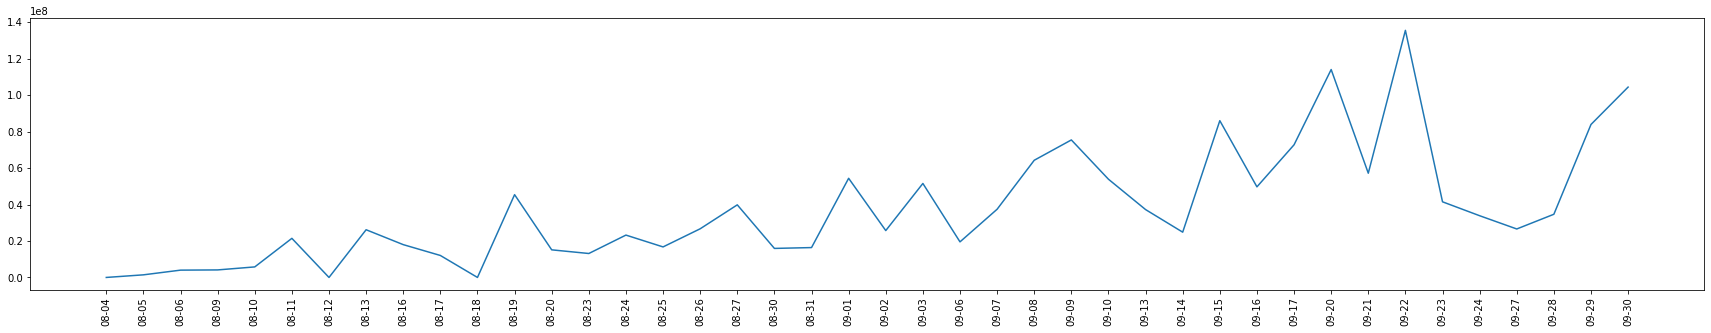

In [86]:
# trend of daily transaction buy saham
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(product_trend['month_date'], product_trend['buy_saham_transaction_amount'])

plt.show()

Insight:

Users who buy reksadana pasar saham is increasing from 4 Aug - 22 Sep 2021 then plummetted in 23 Sep 2021 but rise again in 28 Sep 2021. The highest transaction is in 22/09/2021.

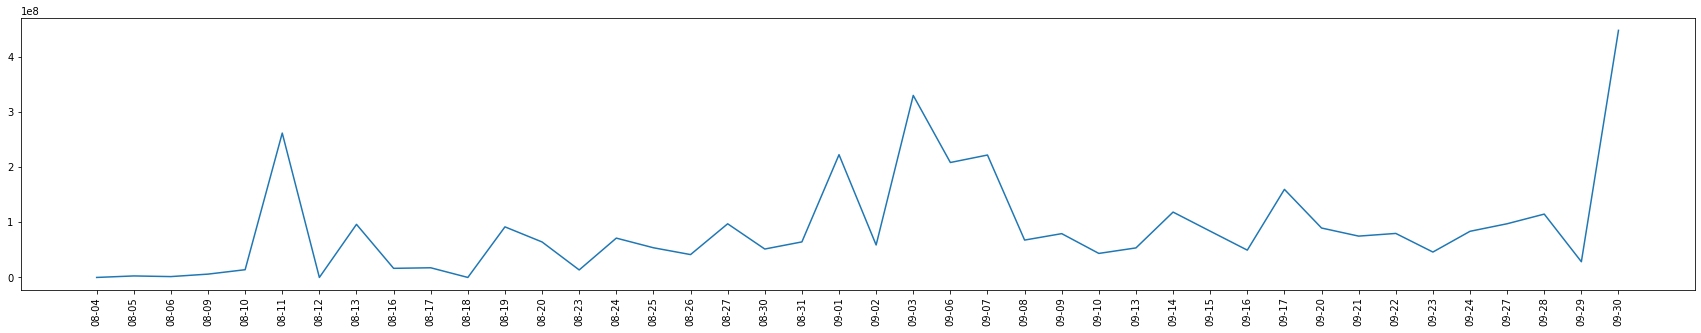

In [87]:
# trend of daily transaction buy pasar uang
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(product_trend['month_date'], product_trend['buy_pasar_uang_transaction_amount'])

plt.show()

Insight:

Users who buy reksadana pasar uang is fluctuative from 4 Aug - 30 Sep 2021 but it has peak in the beginning of the month, probably near the payday. 

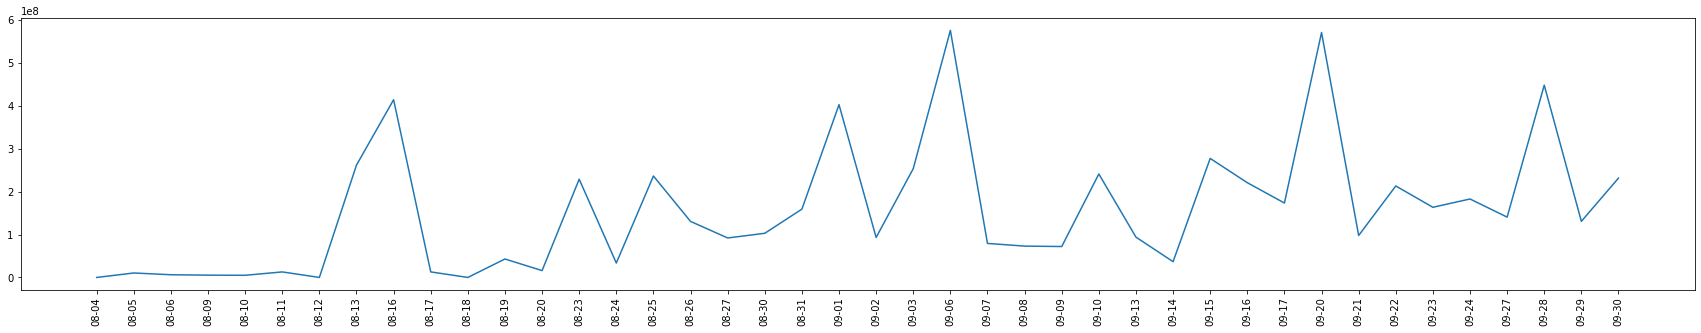

In [88]:
# trend of daily transaction buy pendapatan tetap
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(product_trend['month_date'], product_trend['buy_pendapatan_tetap_transaction_amount'])

plt.show()

Insight:

Users transaction in pendapatan tetap is very fluctuative in August - September 2021 

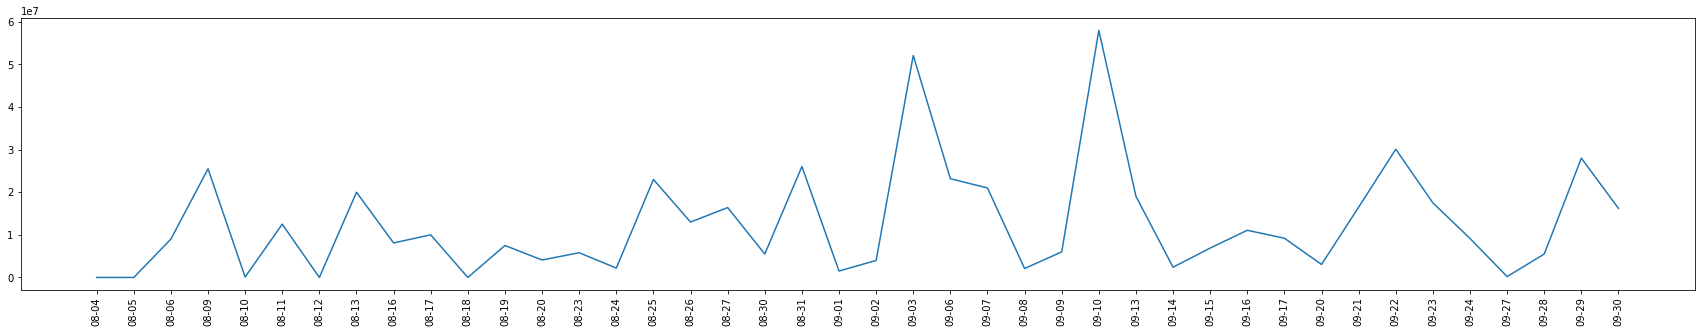

In [89]:
# trend of daily transaction buy campuran
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(product_trend['month_date'], product_trend['buy_campuran_transaction_amount'])

plt.show()

**Insight:**

Buying patern of reksadana campuran is sideways but has spikes in beginning of September 2021.

# **Segmentation**

## Data Preparation

In [90]:
# make a copy for segmentation
user_segmentation = df_users_clean.copy()
user_segmentation.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0,45-54
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0,55-64
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0,45-54
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54


In [91]:
# import library
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
from yellowbrick.cluster import SilhouetteVisualizer  
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

### Preparing user's age and end of month invested amount

In [92]:
df_segmentation_feature = user_segmentation[['user_id', 'user_age', 'end_of_month_invested_amount']]
df_segmentation_feature

,user_id,user_age,end_of_month_invested_amount
0,162882,51,0
1,3485491,55,0
2,1071649,50,0
3,3816789,53,600000
4,3802293,47,13500000
...,...,...,...
14707,4352347,49,0
14708,4288026,49,0
14709,4286882,49,0
14710,4396739,49,0


### Check Data Distribution

#### No Scale

<AxesSubplot:xlabel='user_age', ylabel='end_of_month_invested_amount'>

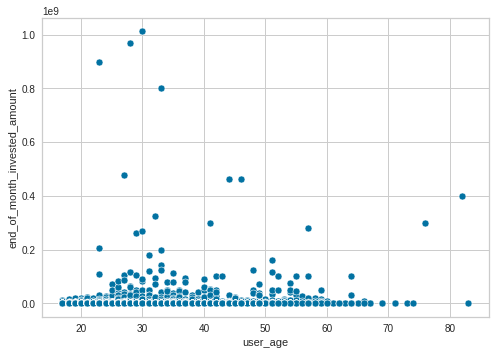

In [93]:
sns.scatterplot(data = df_segmentation_feature, x='user_age', y='end_of_month_invested_amount')

User's age and end of month invested amount is not in the same size, so we need to standardize the size using scaler.

#### Standard Scaler

In [94]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = ['user_age','end_of_month_invested_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<AxesSubplot:xlabel='user_age', ylabel='end_of_month_invested_amount'>

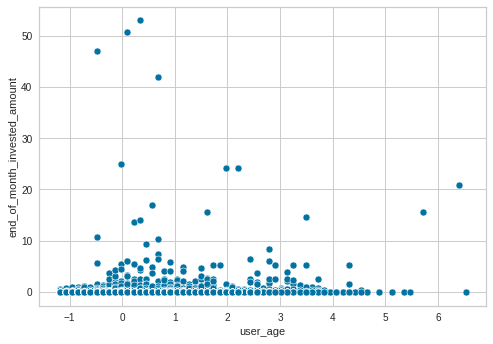

In [95]:
sns.scatterplot (data = ss_scale_df, x='user_age', y='end_of_month_invested_amount')

In [96]:
ss_scale_df[['user_age','end_of_month_invested_amount']].head()

,user_age,end_of_month_invested_amount
0,2.786,-0.076
1,3.253,-0.076
2,2.669,-0.076
3,3.019,-0.044
4,2.318,0.632


In [97]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['user_age','end_of_month_invested_amount']] = rs_scaler.fit_transform(rs_scale_df[['user_age','end_of_month_invested_amount']])

<AxesSubplot:xlabel='user_age', ylabel='end_of_month_invested_amount'>

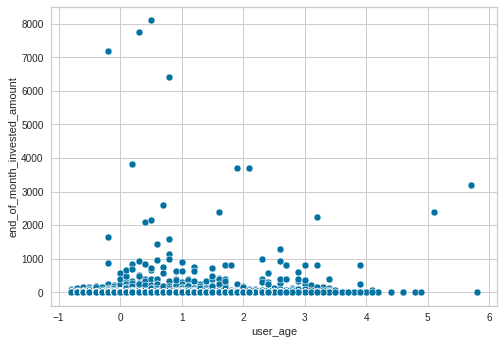

In [98]:
sns.scatterplot (data = rs_scale_df, x='user_age', y='end_of_month_invested_amount')

Create cluster based on user's age and end of month invested amount

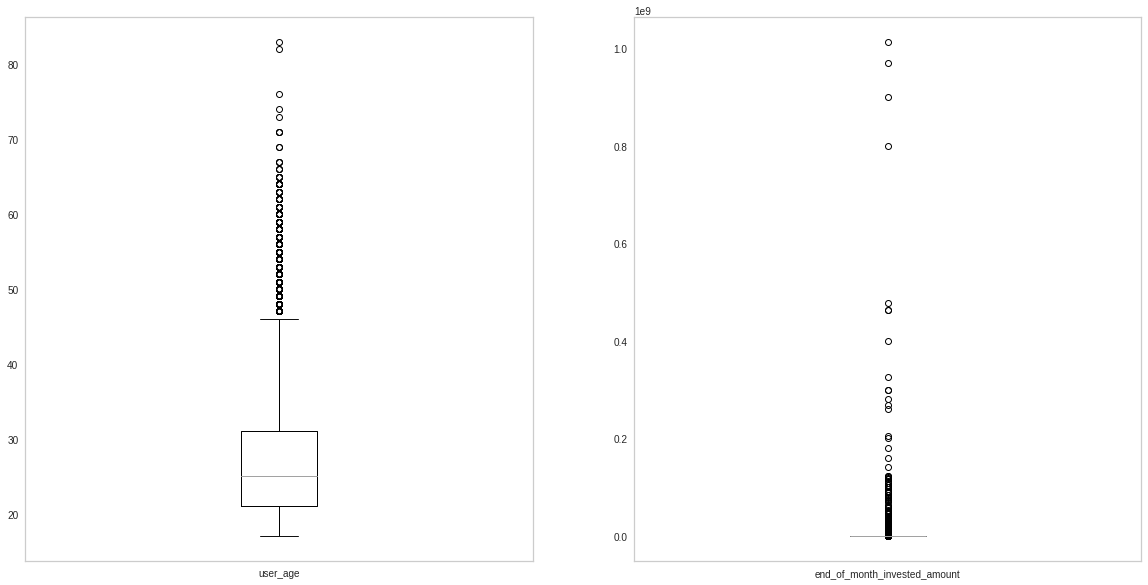

In [99]:
# filter numeric column
feature = ['user_age', 'end_of_month_invested_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = user_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

**Insight:**

The range of user's age 20s to mid 40s, the rest is outliers

#### Encode Category Data

1. user_gender: one hot encoding --> only 2 types of value
2. age_group = data type is category
3. user_occupation = label
4. user_income_range = label
5. referral_code_used = label
6. user_income_source = label

In [100]:
# df_cluster = df_users_clean.copy()
# df_cluster.head()

In [101]:
# # one hot encoding user_gender
# copy_gender = pd.get_dummies(df_cluster, columns=['user_gender'], prefix=['user_gender'])
# df_cluster = df_cluster.merge(copy_gender)
# df_cluster

In [102]:
# # one hot encoding user_occupation
# copy_occ = pd.get_dummies(df_cluster, columns=['user_occupation'], prefix=['user_occupation'])
# df_cluster = df_cluster.merge(copy_occ)
# df_cluster

In [103]:
# # one hot encoding user income range
# df_cluster['user_income_range'].unique() # check the category of user income range

In [104]:
# # change the data type to category
# df_cluster['user_income_range'] = df_cluster['user_income_range'].astype('category')
# df_cluster['income_range'] = df_cluster['user_income_range'].cat.set_categories(["< 10 Juta", "Rp 10 Juta - 50 Juta", "> Rp 50 Juta - 100 Juta","> Rp 100 Juta"], ordered=True)
# df_cluster['income_range'] = df_cluster['income_range'].cat.codes
# df_cluster

In [105]:
# # one hot encoding referral code 
# copy_ref_code = pd.get_dummies(df_cluster, columns=['referral_code_used'], prefix=['referral_code_used'])
# df_cluster = df_cluster.merge(copy_ref_code)
# df_cluster

In [106]:
# df_cluster.info()

### Cluster

#### Elbow Method

We will determine the number of cluster using elbow method and if the result is not significant enough, we will continue to use silhouette analysis.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 9439175539564272.0
2 1788086724727075.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 1030102514344591.2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 560772148264889.56


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 352192842488994.9


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 267408920458917.12


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 188181093583526.75


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 144141815729955.22


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 111292948389288.94


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 90315073751798.33


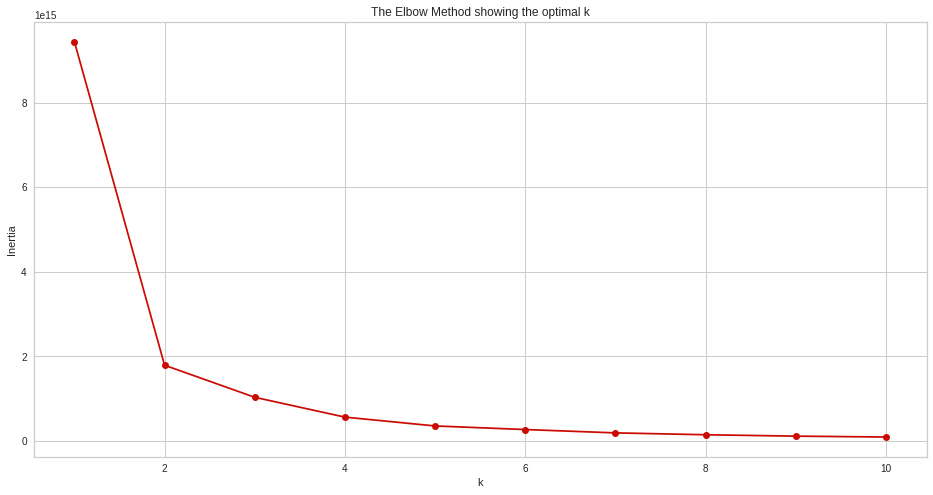

In [107]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(ss_scale_df)    # --> using data that has been standardized using scaler
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'ro-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow fracture is in 2, but the inetia still high enough. Let's try the another method to define the cluster, using silhouette analysis.

#### Silhouette Analysis

In [108]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.9691529366266061


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6558877898523199


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6561982548310995


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5791425929776929


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5825763701287544


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.5630361394464298


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.5350477092408414


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.525804445986456


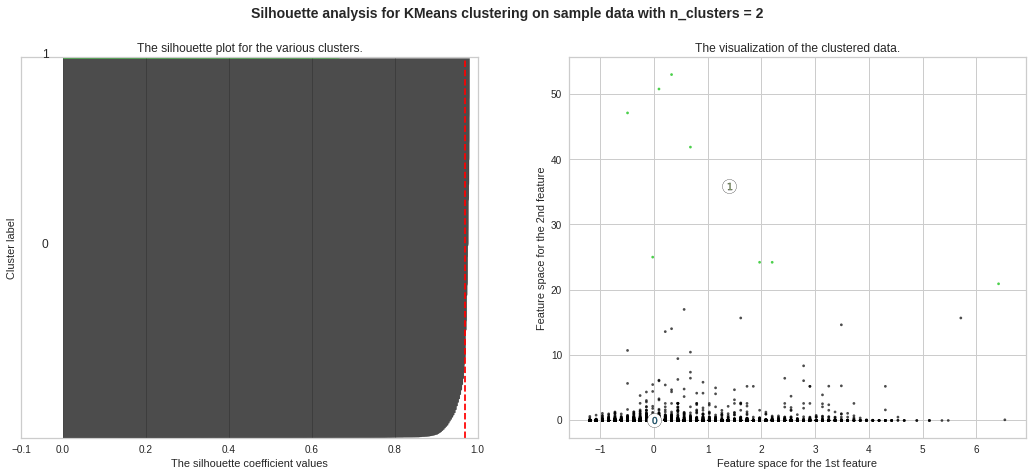

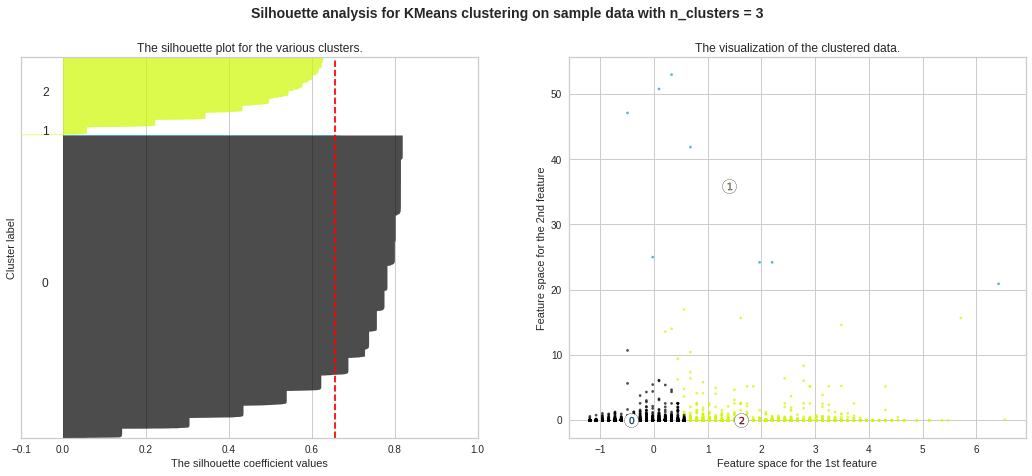

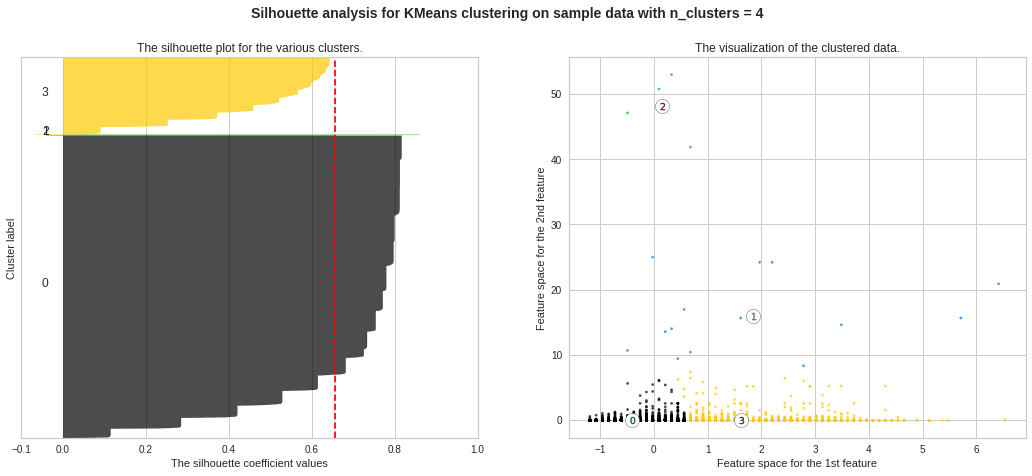

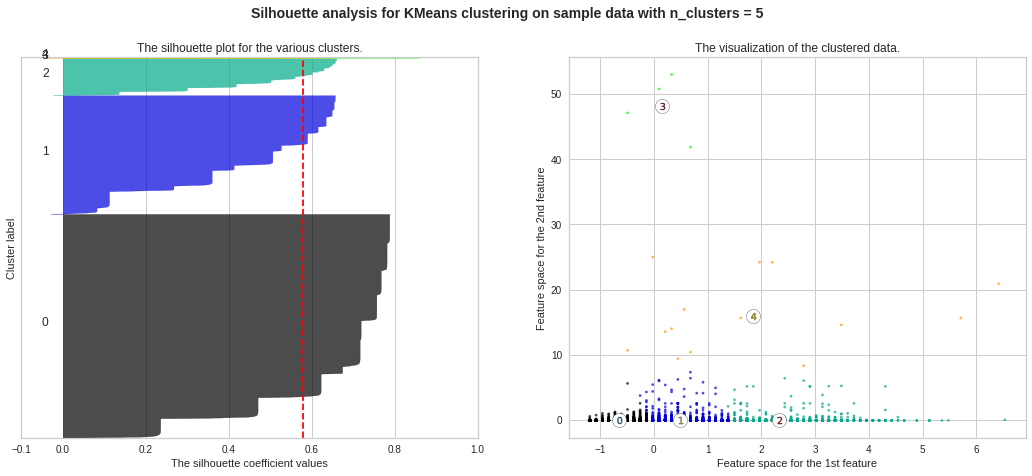

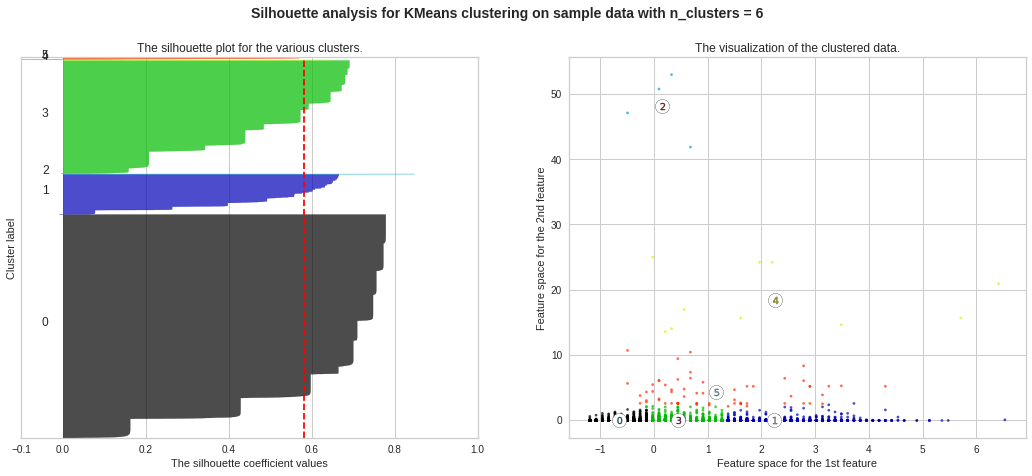

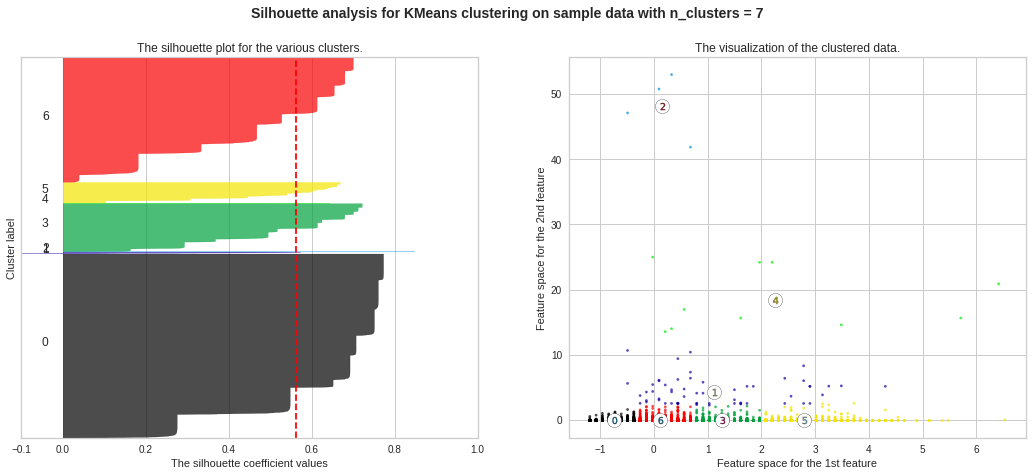

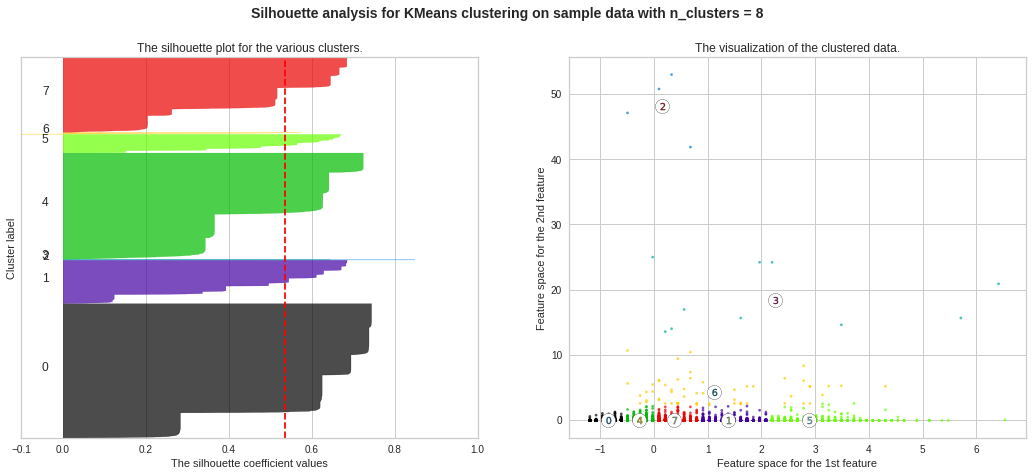

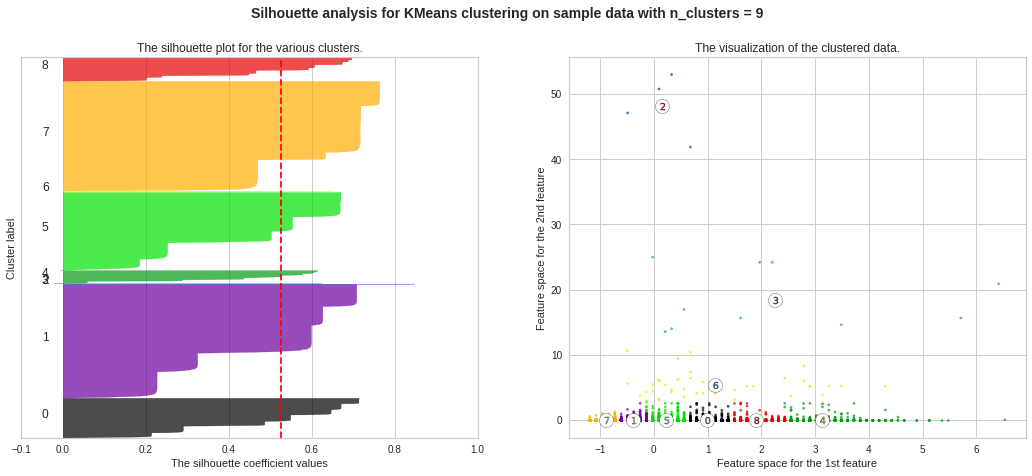

In [109]:
silhoutte_analysis(ss_scale_df[['user_age', 'end_of_month_invested_amount']],list(range(2,10))) 

**Insight:**

We will use 3 cluster. Since in the beginning we already know that some age dominating the data, so I will ignore the different (big) size in cluster 0. Beside that, the silhoutte is passing the silhouette coefficient.

## Segmentation

Using ss_scaler

In [110]:
# make cluster
Cluster_5 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=5)   
cluster_model.fit_predict(Cluster_5[['user_age', 'end_of_month_invested_amount']])
Cluster_5['cluster'] = cluster_model.labels_
Cluster_5.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,end_of_month_invested_amount,cluster
0,162882,2.786,-0.076,0
1,3485491,3.253,-0.076,0
2,1071649,2.669,-0.076,0
3,3816789,3.019,-0.044,0
4,3802293,2.318,0.632,0


In [111]:
Cluster_5['cluster'].unique() # check number of cluster

array([0, 4, 1, 3, 2], dtype=int32)

<AxesSubplot:xlabel='cluster', ylabel='user_age'>

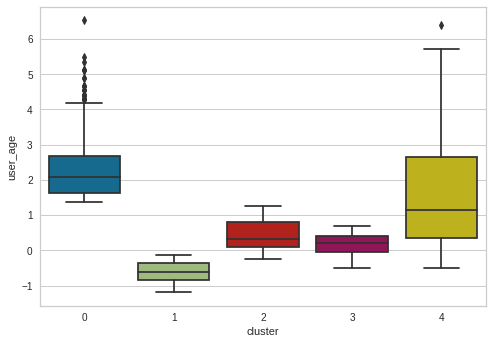

In [112]:
# Number of transaction
sns.boxplot (data =Cluster_5, x ='cluster' , y ='user_age')

<AxesSubplot:xlabel='cluster', ylabel='end_of_month_invested_amount'>

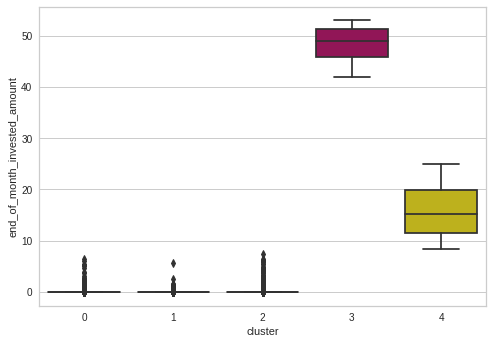

In [113]:
# Number of transaction
sns.boxplot (data =Cluster_5 , x ='cluster' , y ='end_of_month_invested_amount')



In [114]:
# make cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)
cluster_model.fit_predict(Cluster_4[['user_age', 'end_of_month_invested_amount']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,end_of_month_invested_amount,cluster
0,162882,2.786,-0.076,2
1,3485491,3.253,-0.076,2
2,1071649,2.669,-0.076,2
3,3816789,3.019,-0.044,2
4,3802293,2.318,0.632,2


<AxesSubplot:xlabel='cluster', ylabel='user_age'>

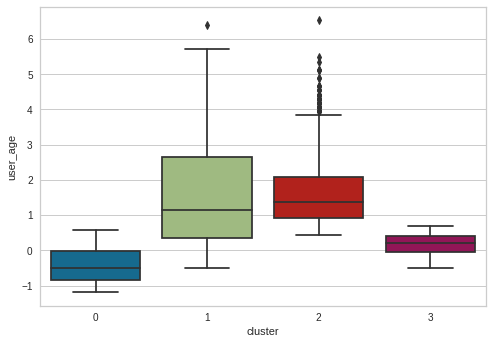

In [115]:
# Number of transaction
sns.boxplot (data =Cluster_4, x ='cluster' , y ='user_age')

<AxesSubplot:xlabel='cluster', ylabel='end_of_month_invested_amount'>

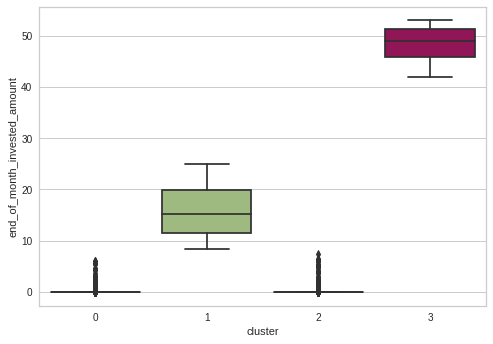

In [116]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='end_of_month_invested_amount')

In [117]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['user_age', 'end_of_month_invested_amount']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,end_of_month_invested_amount,cluster
0,162882,2.786,-0.076,2
1,3485491,3.253,-0.076,2
2,1071649,2.669,-0.076,2
3,3816789,3.019,-0.044,2
4,3802293,2.318,0.632,2


<AxesSubplot:xlabel='cluster', ylabel='user_age'>

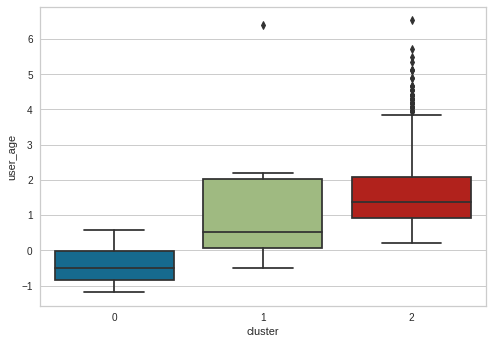

In [118]:
# Number of transaction
sns.boxplot (data =Cluster_3, x ='cluster' , y ='user_age')

<AxesSubplot:xlabel='cluster', ylabel='end_of_month_invested_amount'>

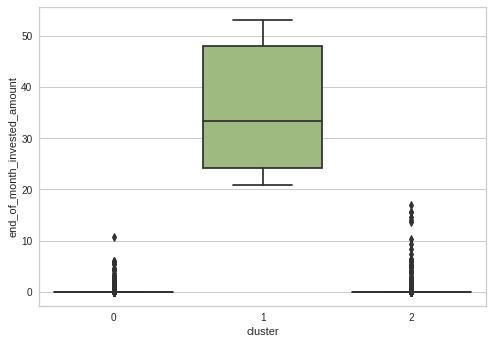

In [119]:
# Number of transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='end_of_month_invested_amount')

## Merge Cluster Result with Datasets

Combine data cluster 3 with merge data

In [120]:
df_segmented = Cluster_3.merge(df_merge,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_age_x,end_of_month_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,...,end_of_month_invested_amount_y,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,3.019,-0.044,2,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,...,600000,100000,0,45-54,2021-09-30,290000.000,40000.000,270000.000,0.000,600000
1,3802293,2.318,0.632,2,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,...,13500000,8500000,0,45-54,2021-09-30,8920000.000,1350000.000,3230000.000,0.000,13500000
2,3049927,3.019,-0.023,2,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,...,999000,149000,0,45-54,2021-09-30,40000.000,10000.000,50000.000,899000.000,999000
3,3836491,3.721,-0.075,2,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,...,10000,0,0,55-64,2021-09-30,0.000,10000.000,0.000,0.000,10000
4,3783302,3.487,-0.070,2,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,...,110431,1000000,-1889569,55-64,2021-09-30,0.000,0.000,110431.000,0.000,110431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2.552,-0.076,2,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,...,0,350000,-450000,45-54,2021-09-30,0.000,0.000,0.000,0.000,0
8273,3798265,2.552,-0.076,2,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,...,0,25000,-125000,45-54,2021-09-30,0.000,0.000,0.000,0.000,0
8274,3670811,2.552,-0.053,2,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no referral,...,435000,240000,0,45-54,2021-09-30,210000.000,130000.000,95000.000,0.000,435000
8275,3812221,2.552,-0.076,2,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no referral,...,0,150000,-250000,45-54,2021-09-30,0.000,0.000,0.000,0.000,0


In [121]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   user_age_x                        8277 non-null   float64       
 2   end_of_month_invested_amount_x    8277 non-null   float64       
 3   cluster                           8277 non-null   int32         
 4   registration_import_datetime      8277 non-null   datetime64[ns]
 5   user_gender                       8277 non-null   object        
 6   user_age_y                        8277 non-null   int64         
 7   user_occupation                   8277 non-null   object        
 8   user_income_range                 8277 non-null   object        
 9   referral_code_used                8277 non-null   object        
 10  user_income_source                8277 non-null 

## Visualize Cluster

Create cluster name

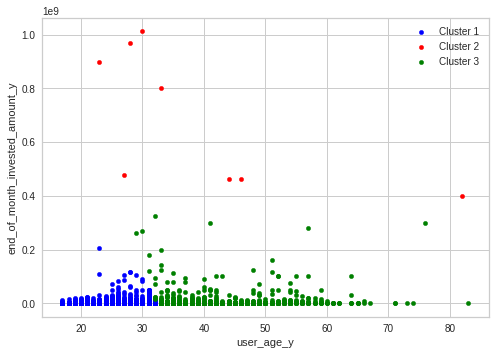

In [122]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='user_age_y', y='end_of_month_invested_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='user_age_y', y='end_of_month_invested_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='user_age_y', y='end_of_month_invested_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)
# cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='user_age_y', y='end_of_month_invested_amount_y', c='yellow', label='Cluster 4', ax = cluster_scatter)
# cluster_scatter = df_segmented[df_segmented['cluster'] == 4].plot.scatter(x='user_age_y', y='end_of_month_invested_amount_y', c='orange', label='Cluster 5', ax = cluster_scatter)

### Descriptive Statistic

In [123]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y','end_of_month_invested_amount_y']].agg(['count','mean','min','max','median']).T

cluster                                           0              1  \
user_age_y                     count       6578.000          8.000   
                               mean          23.646         39.125   
                               min           17.000         23.000   
                               max           32.000         82.000   
                               median        23.000         31.500   
end_of_month_invested_amount_y count       6578.000          8.000   
                               mean     1125487.748  685778338.250   
                               min            0.000  400000000.000   
                               max    205014673.000 1012200000.000   
                               median    100000.000  639038353.000   

cluster                                           2  
user_age_y                     count       1691.000  
                               mean          41.046  
                               min           29.000  
                               max           83.000  
                               median        39.000  
end_of_month_invested_amount_y count       1691.000  
                               mean     4957901.470  
                               min            0.000  
                               max    325000000.000  
                               median    200000.000

The data above shows the descriptive statistic of each cluster. 

* Cluster 0 average user's age is 41 y.o, start from age 29; and the end of month invested amount is 4,957,901 

* Cluster 1 average user's age is 24 y.o, start from age 17. and the end of month invested amount is 1,125,487

* Cluster 2 average user's age is 39 y.o, start from age 23. and the end of month invested amount is 685,778,338


### Cluster Interpretation

In [124]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_age_x,end_of_month_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount_y,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,3.019,-0.044,2,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-09-30,290000.000,40000.000,270000.000,0.000,600000
1,3802293,2.318,0.632,2,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54,2021-09-30,8920000.000,1350000.000,3230000.000,0.000,13500000
2,3049927,3.019,-0.023,2,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,999000,149000,0,45-54,2021-09-30,40000.000,10000.000,50000.000,899000.000,999000
3,3836491,3.721,-0.075,2,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0,55-64,2021-09-30,0.000,10000.000,0.000,0.000,10000
4,3783302,3.487,-0.070,2,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,110431,1000000,-1889569,55-64,2021-09-30,0.000,0.000,110431.000,0.000,110431


In [125]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   user_age_x                        8277 non-null   float64       
 2   end_of_month_invested_amount_x    8277 non-null   float64       
 3   cluster                           8277 non-null   int32         
 4   registration_import_datetime      8277 non-null   datetime64[ns]
 5   user_gender                       8277 non-null   object        
 6   user_age_y                        8277 non-null   int64         
 7   user_occupation                   8277 non-null   object        
 8   user_income_range                 8277 non-null   object        
 9   referral_code_used                8277 non-null   object        
 10  user_income_source                8277 non-null 

Things that can be analyzed:
* User age
* End of month invested amount
* User occupation
* User income range
* User income source
* Saham Invested Amount
* Pasar Uang Invested Amount
* Pendapatan Tetap Invested Amount
* Campuran Invested Amount

#### User Age

In [126]:
df_segmented.groupby(['cluster'], as_index = False)['user_age_y'].mean()

,cluster,user_age_y
0,0,23.646
1,1,39.125
2,2,41.046


**Insight:**

0 = average user age is 24 y.o.

1 = average user age is 41 y.o.

2 = average user age is 39 y.o.

#### End of month invested amount

In [127]:
df_segmented.groupby(['cluster'], as_index = False)['end_of_month_invested_amount_y'].mean()

,cluster,end_of_month_invested_amount_y
0,0,1125487.748
1,1,685778338.250
2,2,4957901.470


**Insight:**

0 = average invested amount 1,125,488

1 = average invested amount 4,957,901

2 = average invested amount 685,778,338

#### User Occupation

In [128]:
user_occupation_check = df_segmented.groupby(['cluster', 'user_occupation'], as_index = False)['user_id'].count()
# user_occupation_check = user_occupation_check.sort_values(by='user_id', ascending = False)
user_occupation_check = user_occupation_check.sort_values(by=['cluster', 'user_id'], ascending=[True, False])
user_occupation_check

,cluster,user_occupation,user_id
4,0,Pelajar,4435
6,0,Swasta,961
2,0,Others,736
1,0,IRT,218
5,0,Pengusaha,148
0,0,Guru,36
3,0,PNS,30
7,0,TNI/Polisi,14
8,1,IRT,3
10,1,Swasta,3


**Insight:**

0 = Most user's occupation in cluster 0 is Pelajar, and the least is Swasta

1 = Most user's occupation in cluster 1 is Swasta, and the least is IRT

2 = Most user's occupation in cluster 2 is IRT, and the least is Swasta

#### User income range

In [129]:
user_income_range_check = df_segmented.groupby(['cluster', 'user_income_range'], as_index = False)['user_id'].count()
user_income_range_check = user_income_range_check.sort_values(by=['cluster', 'user_id'], ascending=[True, False])
user_income_range_check

,cluster,user_income_range,user_id
0,0,< 10 Juta,3223
5,0,Rp 10 Juta - 50 Juta,2150
3,0,> Rp 50 Juta - 100 Juta,904
2,0,> Rp 100 Juta - 500 Juta,287
4,0,> Rp 500 Juta - 1 Miliar,9
1,0,> Rp 1 Miliar,5
7,1,> Rp 100 Juta - 500 Juta,4
8,1,> Rp 50 Juta - 100 Juta,2
6,1,< 10 Juta,1
9,1,> Rp 500 Juta - 1 Miliar,1


**Insight:**

0 = Most user's income range in cluster 0 is < 10 juta

1 = Most user's income range in cluster 1 is 10 - 50 juta

2 = Most user's income range in cluster 2 is > 100 - 500 juta

#### User income source

In [130]:
user_income_source_check = df_segmented.groupby(['cluster', 'user_income_source'], as_index = False)['user_id'].count()
user_income_source_check = user_income_source_check.sort_values(by=['cluster', 'user_id'], ascending=[True, False])
user_income_source_check

,cluster,user_income_source,user_id
3,0,Gaji,4018
8,0,Undian,903
5,0,Keuntungan Bisnis,724
1,0,Dari Orang Tua / Anak,368
7,0,Tabungan,228
6,0,Lainnya,194
4,0,Hasil Investasi,77
2,0,Dari Suami / istri,39
9,0,Warisan,16
0,0,Bunga Simpanan,11


**Insight:**

0 = Most user's income source in cluster 0 is gaji, the second is from keuntungan bisnis

1 = Most user's income source in cluster 1 is gaji, the second is from undian

2 = Most user's income source in cluster 2 is gaji, thw second is from orang tua/anak

#### Saham Invested Amount

In [131]:
df_segmented.groupby(['cluster'], as_index = False)['saham_invested_amount'].mean()

,cluster,saham_invested_amount
0,0,214392.152
1,1,1625000.000
2,2,805148.964


**Insight:**

0 = average amount invested in reksadana saham is 214,392

1 = average amount invested in reksadana saham is 805,148

2 = average amount invested in reksadana saham is 1,625,000

#### Pasar Uang Invested Amount

In [132]:
df_segmented.groupby(['cluster'], as_index = False)['pasar_uang_invested_amount'].mean()

,cluster,pasar_uang_invested_amount
0,0,372205.375
1,1,217784494.375
2,2,1356080.746


**Insight:**

0 = average amount invested in reksadana pasar uang is 372,205

1 = average amount invested in reksadana pasar uang is 1,356,080

2 = average amount invested in reksadana pasar uang is 217,784,494

#### Pendapatan Tetap Invested Amount

In [133]:
df_segmented.groupby(['cluster'], as_index = False)['pendapatan_tetap_invested_amount'].mean()

,cluster,pendapatan_tetap_invested_amount
0,0,444225.718
1,1,461618843.875
2,2,2259475.293


**Insight:**

0 = average amount invested in reksadana pendapatan tetap is 444,226

1 = average amount invested in reksadana pendapatan tetap is 2,259,475

2 = average amount invested in reksadana pendapatan tetap is 461,618,843

#### Campuran Invested Amount

In [134]:
df_segmented.groupby(['cluster'], as_index = False)['campuran_invested_amount'].mean()

,cluster,campuran_invested_amount
0,0,94664.503
1,1,4750000.000
2,2,537196.468


**Insight:**

0 = average amount invested in reksadana campuran is 94,664

1 = average amount invested in reksadana campuran is 537,196

2 = average amount invested in reksadana campuran is 4,750,000

#### Total Invested Amount

In [135]:
df_segmented.groupby(['cluster'], as_index = False)['total_invested_amount'].mean()

,cluster,total_invested_amount
0,0,1125487.748
1,1,685778338.250
2,2,4957901.470


Insight:

0 = average total of investment is 1,125,488

1 = average total of investment is 4,957,901

2 = average total of investment is 685,778,338


## Recommendation

What kind of thematic campaigns that we can recommend to the marketing team for the next month?

--> Thematic campaigns based on user preference

--> Create segmentation for campaign and give recommendation

## **Theme** 

Naik-naik ke puncak gunung~
Sedikit demi sedikit lama-lama menjadi gunung!

Nabung mulai sekarang, capai financial freedom-mu sekarang!




**Cluster 0**

Because the users are mostly students and in young age, the campaigns that related to young would be recommended, such as:

* start early to financial freedom

create a program for youth to invest from small amount but continously until reach their financial freedom target

* prepare education funds

create a program for students to saving and investing their money for education

* promo nabung rutin and get cash back

saving minimal IDR 1,000,000 per month until 3 months, get cashback point 5% max IDR. 100,000 --> suitable for users that mostly salary < 10 mio.


**Cluster 1**

In this cluster, average user's age is 24 with salary 10 - 50 mio, but the total investment is still small.

* retirement planning program

* promo nabung rutin and get cash back
saving minimal IDR 2,000,000 per month until 3 months, get cashback point 5% max IDR. 500,000 --> suitable for users that mostly salary 10 - 50 mio.

* promotion to invest for umroh and education for their children


**Cluster 2**

Users are adults but invest in big amount of investment.

* wealth management campaigns

1. provide webinar for users to give more knowledge about money management and investment

2. provide retirement planning program

3. provide relationship manager to give best investment recommendation for priority custumers.



In [136]:
grad = [] # defining list for absolute gradien difference
num = list(K) # listing K
t = [] # defining list for titik/while condition
titik = 1 # starting condition
while titik in num and titik <= max(num): # while syntax
  if titik == max(num): # condition if the dots is in the corner (1st)
    titik += 1
  elif titik == min(num): # condition if the dots is in the corner (last)
    titik += 1
  else: # dots is in the middle
    t.append(titik) # inputing titik to t
    grad.append((abs(abs(distortions[titik] - distortions[titik-1]) - abs(distortions[titik-1]-distortions[titik -2]))/(abs(distortions[titik-1]-distortions[titik -2])))*100) # percentage of absolute gradien differences
    titik += 1 # adding value to titik for next calculation
summ = pd.DataFrame(list(zip(t, grad)), 
               columns =['No of Cluster', 'Grad diff']) # making table for each calculation
summ # result

,No of Cluster,Grad diff
0,2,90.093
1,3,38.082
2,4,55.558
3,5,59.352
4,6,6.553
5,7,44.414
6,8,25.410
7,9,36.138


# **Churn Rate**

## Preparation

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
# import users data
sheet_url = 'https://docs.google.com/spreadsheets/d/1WxGrECbxJzD3cJmkuZ7sorxGQJwWCTIP1N04_Z7UaCw/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=0','/export?format=csv&gid=0')
print(sheet_url_trf)
df_churn = pd.read_csv(sheet_url_trf)
df_churn.head()

https://docs.google.com/spreadsheets/d/1WxGrECbxJzD3cJmkuZ7sorxGQJwWCTIP1N04_Z7UaCw/export?format=csv&gid=0


,user_id,churn
0,50701,1
1,50961,1
2,51883,0
3,53759,0
4,54759,1


In [139]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  8484 non-null   int64
 1   churn    8484 non-null   int64
dtypes: int64(2)
memory usage: 132.7 KB


In [140]:
df_churn['user_id'] = df_churn['user_id'].astype(str) # change data type user_id to object

In [141]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  8484 non-null   object
 1   churn    8484 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 132.7+ KB


## Merge churn with merge data

In [142]:
# merge data df_merge and df_churn 
df_merge_churn = df_merge.merge(df_churn)
df_merge_churn.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,churn
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,45-54,2021-09-30,290000.000,40000.000,270000.000,0.000,600000,0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,45-54,2021-09-30,8920000.000,1350000.000,3230000.000,0.000,13500000,0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,999000,149000,0,45-54,2021-09-30,40000.000,10000.000,50000.000,899000.000,999000,0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0,55-64,2021-09-30,0.000,10000.000,0.000,0.000,10000,0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,110431,1000000,-1889569,55-64,2021-09-30,0.000,0.000,110431.000,0.000,110431,0


In [143]:
df_merge_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   registration_import_datetime      8277 non-null   datetime64[ns]
 2   user_gender                       8277 non-null   object        
 3   user_age                          8277 non-null   int64         
 4   user_occupation                   8277 non-null   object        
 5   user_income_range                 8277 non-null   object        
 6   referral_code_used                8277 non-null   object        
 7   user_income_source                8277 non-null   object        
 8   end_of_month_invested_amount      8277 non-null   int64         
 9   total_buy_amount                  8277 non-null   int64         
 10  total_sell_amount                 8277 non-null 

In [144]:
df_merge_churn.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount', 'age_group', 'date',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount', 'churn'],
      dtype='object')

In [145]:
numerical_column = ['total_buy_amount','total_sell_amount', 'user_age','end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount', 'age_group', 'date',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount', 'churn']
binary_categorical_column = ['user_income_range']
polytomous_categorical_column = ['user_income_range', 'user_income_source']


# **EDA**

       user_id
churn         
0         4809
1         3468


<AxesSubplot:xlabel='churn', ylabel='user_id'>

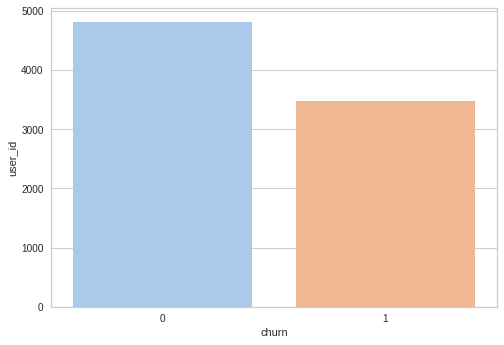

In [199]:
grouped = df_merge_churn.groupby('churn').agg('count')['user_id']
grouped = pd.DataFrame(grouped)
print(grouped)
# grouped
sns.barplot(x=grouped.index, y="user_id", data=grouped, palette='pastel')

Number of churn users is 3468

In [147]:
3468/(4809+3468)

0.41899238854657483

Data is relatively balance but I need to add class_weight='balanced' to logit parameter

check correlation >> But before that, we need to transform categorical variable

In [148]:
# Categorical variable untuk variabel yang category-nya ada 2
df_new = df_merge_churn.copy()
for i in binary_categorical_column+['churn']:
  df_new[i] = df_new[i].astype('category')
  df_new[i] = df_new[i].cat.codes
  df_new[i] = df_new[i].astype(int)

In [149]:
# Dummy variable untuk variabel yang category-nya > 2
for i in polytomous_categorical_column:
  dum_df = pd.get_dummies(df_new, columns=[i], prefix=[i], drop_first = True)
  df_new = df_new.merge(dum_df)

In [150]:
df_new.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,churn,user_income_range_1,user_income_range_2,user_income_range_3,user_income_range_4,user_income_range_5,user_income_source_Dari Orang Tua / Anak,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan
0,3816789,2021-08-12 07:19:32,Female,53,IRT,3,no referral,Gaji,600000,100000,0,45-54,2021-09-30,290000.000,40000.000,270000.000,0.000,600000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,4,used referral,Gaji,13500000,8500000,0,45-54,2021-09-30,8920000.000,1350000.000,3230000.000,0.000,13500000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,0,no referral,Gaji,999000,149000,0,45-54,2021-09-30,40000.000,10000.000,50000.000,899000.000,999000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3836491,2021-08-18 11:32:25,Male,59,Others,0,used referral,Lainnya,10000,0,0,55-64,2021-09-30,0.000,10000.000,0.000,0.000,10000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,3,no referral,Gaji,110431,1000000,-1889569,55-64,2021-09-30,0.000,0.000,110431.000,0.000,110431,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


list the column that we want to see the correlation (excluding the one that are still in string, and excluding Churn)

In [151]:
# Ambil semua kolom yang tipenya sudah numerik
corr_column = df_new.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['churn']))
corr_column

['user_income_range_1',
 'user_income_source_Dari Orang Tua / Anak',
 'saham_invested_amount',
 'pasar_uang_invested_amount',
 'pendapatan_tetap_invested_amount',
 'total_invested_amount',
 'total_buy_amount',
 'user_income_source_Gaji',
 'user_age',
 'user_income_range_4',
 'user_income_source_Warisan',
 'campuran_invested_amount',
 'user_income_source_Dari Suami / istri',
 'user_income_source_Tabungan',
 'end_of_month_invested_amount',
 'user_income_range_3',
 'user_income_range_5',
 'user_income_source_Lainnya',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Undian',
 'total_sell_amount',
 'user_income_range_2',
 'user_income_source_Hasil Investasi',
 'user_income_range']

In [152]:
len(corr_column)

24

In [153]:
df_new[corr_column]

,user_income_range_1,user_income_source_Dari Orang Tua / Anak,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,total_invested_amount,total_buy_amount,user_income_source_Gaji,user_age,user_income_range_4,user_income_source_Warisan,campuran_invested_amount,user_income_source_Dari Suami / istri,user_income_source_Tabungan,end_of_month_invested_amount,user_income_range_3,user_income_range_5,user_income_source_Lainnya,user_income_source_Keuntungan Bisnis,user_income_source_Undian,total_sell_amount,user_income_range_2,user_income_source_Hasil Investasi,user_income_range
0,0,0,290000.000,40000.000,270000.000,600000,100000,1,53,0,0,0.000,0,0,600000,1,0,0,0,0,0,0,0,3
1,0,0,8920000.000,1350000.000,3230000.000,13500000,8500000,1,47,1,0,0.000,0,0,13500000,0,0,0,0,0,0,0,0,4
2,0,0,40000.000,10000.000,50000.000,999000,149000,1,53,0,0,899000.000,0,0,999000,0,0,0,0,0,0,0,0,0
3,0,0,0.000,10000.000,0.000,10000,0,0,59,0,0,0.000,0,0,10000,0,0,1,0,0,0,0,0,0
4,0,0,0.000,0.000,110431.000,110431,1000000,1,57,0,0,0.000,0,0,110431,1,0,0,0,0,-1889569,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,0,0,0.000,0.000,0.000,0,350000,0,49,0,0,0.000,0,0,0,0,0,1,0,0,-450000,1,0,2
8273,0,0,0.000,0.000,0.000,0,25000,0,49,0,0,0.000,0,0,0,0,1,0,1,0,-125000,0,0,5
8274,0,0,210000.000,130000.000,95000.000,435000,240000,1,49,0,0,0.000,0,0,435000,1,0,0,0,0,0,0,0,3
8275,0,0,0.000,0.000,0.000,0,150000,1,49,0,0,0.000,0,0,0,0,0,0,0,0,-250000,1,0,2


now, let's see the correlation using heatmap

<ipython-input-154-a5ac3fc2bd90>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_new[corr_column].corr(), dtype=np.bool))


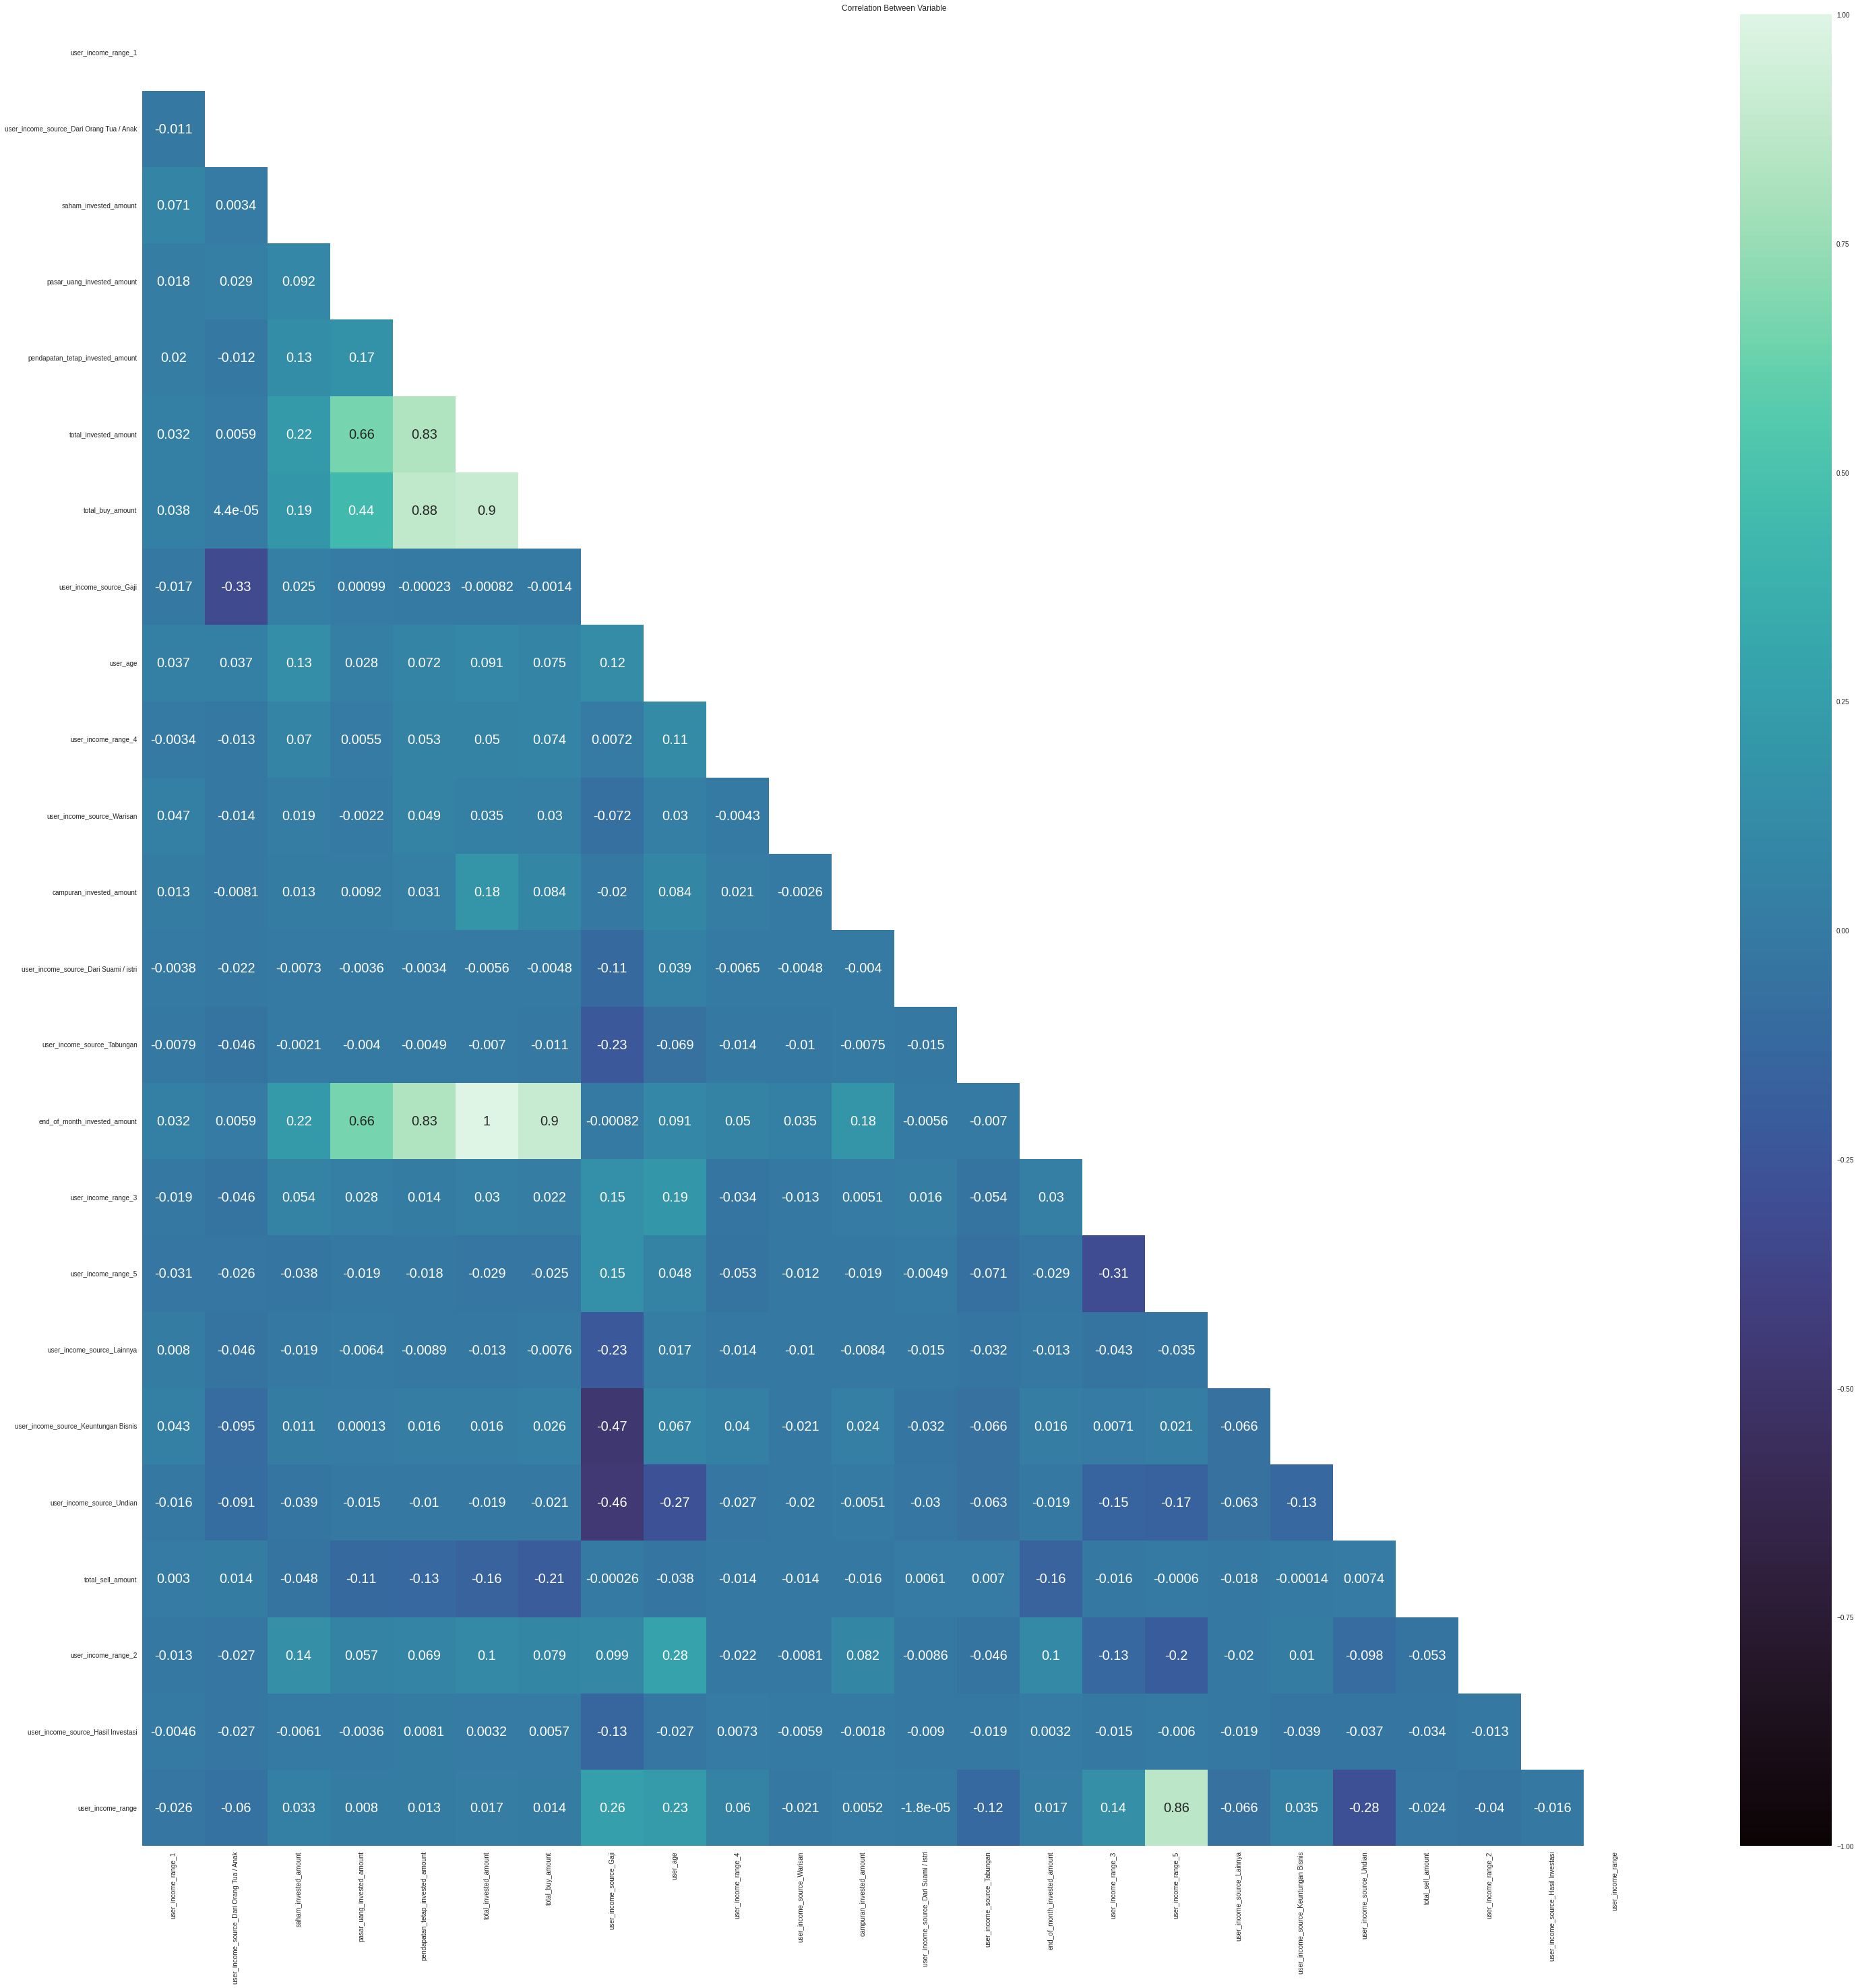

In [154]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

# Supaya matriks korelasi yang terlihat cuman bagian bawahnya
mask = np.triu(np.ones_like(
    df_new[corr_column].corr(), dtype=np.bool))

sns.heatmap(df_new[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

At this point, we need to choose which variables we want to include to our model.

The rule is: choose variables that are low-correlated to other variables

This means choose the threshold (e.g. if correlation < 0.7) and remove any variables that has any correlation greater than 0.7


In [155]:
# Create correlation matrix
corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)] #list comprehension -> combining for loop and list
to_drop

<ipython-input-155-f0e9821917d3>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['total_buy_amount',
 'pendapatan_tetap_invested_amount',
 'total_invested_amount',
 'user_income_range_5']

In [156]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['user_income_range_1',
 'user_income_source_Dari Orang Tua / Anak',
 'saham_invested_amount',
 'pasar_uang_invested_amount',
 'user_income_source_Gaji',
 'user_age',
 'user_income_source_Warisan',
 'user_income_range_4',
 'campuran_invested_amount',
 'user_income_source_Dari Suami / istri',
 'user_income_source_Tabungan',
 'end_of_month_invested_amount',
 'user_income_range_3',
 'user_income_source_Lainnya',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Undian',
 'total_sell_amount',
 'user_income_range_2',
 'user_income_source_Hasil Investasi',
 'user_income_range']

In [157]:
len(to_keep)

20

let's see correlation between that variable

<ipython-input-158-b250fec0009c>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_new[corr_column_new].corr(), dtype=np.bool))


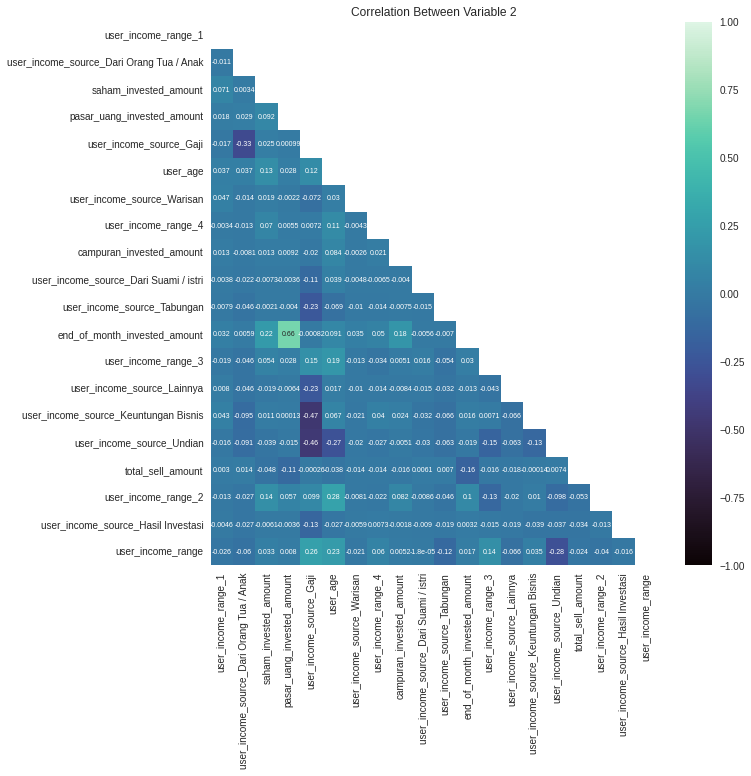

In [158]:
corr_column_new = to_keep

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    df_new[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(df_new[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":7})

plt.show()

# **Logistic Regression**

The standard machine learning method:

    Split data between training and test part (usually 80% training, 20% test)
    Create model in training data
    Validate the model performance on test data



In [159]:
# Separate Churn from other variables
# to_keep_vars = list(set(to_keep) - set(['churn']))
to_keep_vars = to_keep
to_keep_vars

['user_income_range_1',
 'user_income_source_Dari Orang Tua / Anak',
 'saham_invested_amount',
 'pasar_uang_invested_amount',
 'user_income_source_Gaji',
 'user_age',
 'user_income_source_Warisan',
 'user_income_range_4',
 'campuran_invested_amount',
 'user_income_source_Dari Suami / istri',
 'user_income_source_Tabungan',
 'end_of_month_invested_amount',
 'user_income_range_3',
 'user_income_source_Lainnya',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Undian',
 'total_sell_amount',
 'user_income_range_2',
 'user_income_source_Hasil Investasi',
 'user_income_range']

In [160]:
len(to_keep_vars)

20

In [161]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = df_new[to_keep_vars]
y = df_new[['churn']]

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [162]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(6621, 20)
(1656, 20)
(6621, 1)
(1656, 1)


In [163]:
6621/(6621+1656)

0.7999275099673795

In [164]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

churn
0        3861
1        2760
dtype: int64
churn
0        948
1        708
dtype: int64


In [165]:
708/(948+708)

0.427536231884058

In [166]:
2760/(3861+2760)

0.4168554599003172

In [167]:
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [168]:
# Accuracy dr prediksi model dengan data training
model.score(x_training, y_training)

0.6711977042742788

In [169]:
# Accuracy dr prediksi model dengan data training
model.score(x_test, y_test)

0.6751207729468599

## Confussion Matrix

In [170]:
# confusion_matrix(churn actual, churn prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[1715, 2146],
       [  31, 2729]])

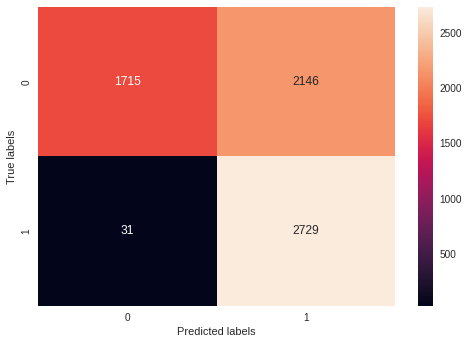

In [171]:
# 0 : Not churn
# 1 : Churn
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

Accuracy precition: 2729

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.98      0.44      0.61      3861
       Churn       0.56      0.99      0.71      2760

    accuracy                           0.67      6621
   macro avg       0.77      0.72      0.66      6621
weighted avg       0.81      0.67      0.65      6621



## Check performance on the test set

In [173]:
model.score(x_test, y_test)

0.6751207729468599

In [174]:
confusion_matrix(y_test, model.predict(x_test))

array([[421, 527],
       [ 11, 697]])

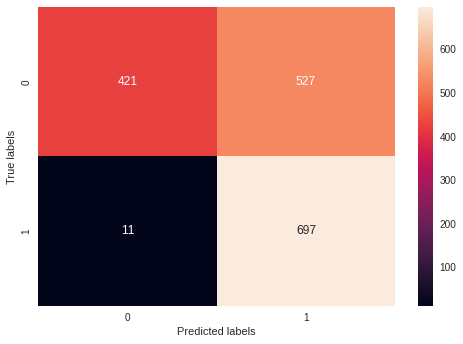

In [175]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

Accuracy precition: 697

# Benefit-Cost Analysis

The budget campaign is only sufficient for 30% of total users on each segment. Thus, we need to choose who will be targeted with the budget limitation and the projection of how profitable the campaign.

The cost per campaign is Rp. 1,000 and the transaction fee (buy and sell) is 0.15%

In [176]:
df_new

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,churn,user_income_range_1,user_income_range_2,user_income_range_3,user_income_range_4,user_income_range_5,user_income_source_Dari Orang Tua / Anak,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan
0,3816789,2021-08-12 07:19:32,Female,53,IRT,3,no referral,Gaji,600000,100000,0,45-54,2021-09-30,290000.000,40000.000,270000.000,0.000,600000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,4,used referral,Gaji,13500000,8500000,0,45-54,2021-09-30,8920000.000,1350000.000,3230000.000,0.000,13500000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,0,no referral,Gaji,999000,149000,0,45-54,2021-09-30,40000.000,10000.000,50000.000,899000.000,999000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3836491,2021-08-18 11:32:25,Male,59,Others,0,used referral,Lainnya,10000,0,0,55-64,2021-09-30,0.000,10000.000,0.000,0.000,10000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,3,no referral,Gaji,110431,1000000,-1889569,55-64,2021-09-30,0.000,0.000,110431.000,0.000,110431,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,2,no referral,Lainnya,0,350000,-450000,45-54,2021-09-30,0.000,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,5,used referral,Keuntungan Bisnis,0,25000,-125000,45-54,2021-09-30,0.000,0.000,0.000,0.000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,3,no referral,Gaji,435000,240000,0,45-54,2021-09-30,210000.000,130000.000,95000.000,0.000,435000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,2,no referral,Gaji,0,150000,-250000,45-54,2021-09-30,0.000,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [177]:
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
8272,0
8273,0
8274,1
8275,0


In [178]:
predicted_prob = model.predict_proba(x)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.538
1,0.965
2,0.511
3,0.500
4,0.496
...,...
8272,0.497
8273,0.499
8274,0.525
8275,0.499


Data above shows the probability of user churn. The bigger, the highest of churn probability

In [200]:
# Get 50% threshold
pct50_threshold = predicted_prob['predicted_score'].quantile(0.5) 

# Get top 30% customers
pct30_customer = predicted_prob[predicted_prob['predicted_score'] > pct50_threshold]

# Merge with actual churn outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)
pct30_customer

,predicted_score,churn
0,0.538,0
1,0.965,0
2,0.511,0
5,0.531,1
6,0.514,1
...,...,...
8269,0.855,1
8270,0.621,1
8271,1.000,1
8274,0.525,1


In [187]:
pct30_customer['churn'].value_counts()

1    2522
0    1614
Name: churn, dtype: int64

Cost campaign = Rp. 1,000 

Loss if customer churn = revenue generated buy cust (X) + acquiring and maintaining cost (Y) + 0.15% * amount of cust transaction

Potential profit if customer is not churn =  0.15% fee

Return = (Benefit of preventing churn) - (Loss if churn happened) - (Cost of marketing campaign)

In [198]:
# let's say the customer transaction amount is 2000000
result = ((0.0015 * 2000000) * 1614) - ((2000000 * 0.0015) * 2522) - (1000 * 4136)
result

-6860000.0

The result is minus because the churn number is bigger, thus the company need to prevent customer churn to minimize the loss.